<a href="https://colab.research.google.com/github/AntoniXGaudi/CW_Workshop/blob/main/Autoscout_local_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part 2: Filling in Missing Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [ ]:
import os
print(os.getcwd())  # | how to know where the csv was saved

C:\Users\wolfg


In [ ]:
file_path = 'C:/Users/wolfg/cleaned_autoscout_part_1.csv'

# Read the csv file into a pandas DataFrame
df = pd.read_csv(file_path)

# Now you can use df in your new notebook

In [ ]:
def df_nans(df, limit):
    """
    Returns a Pandas Series containing the percentage of missing values in each column of the input DataFrame 'df' that
    exceeds the given 'limit'.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze for missing values.
    limit : float
        The threshold (in percentage) above which to consider a column as having too many missing values.

    Returns:
    --------
    pandas.Series
        A Series containing the percentage of missing values in each column of the input DataFrame 'df' that exceeds
        the given 'limit'.
        If no column has missing values that exceed the given limit, returns a string message indicating this.
    """
    missing = df.isnull().sum()*100 / df.shape[0]
    missing = missing.loc[lambda x : x >= limit]
    if missing.empty:
        return "No columns have missing values that exceed the given limit."
    else:
        return missing

def show_missing_values(limit):
    return df_nans(df, limit)

def column_nans(serial):
    # display percentage of NaNs in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [ ]:
def first_looking(*cols):
    """
    Prints basic information about given columns in a Pandas DataFrame.

    Parameters:
    *cols (str): The names of the columns to analyze.

    Returns:
    None.

    Prints:
    - The name of each column.
    - The percentage of null values in each column.
    - The number of null values in each column.
    - The number of unique values in each column.
    - The value counts for each unique value in each column, including null values.
    """
    for col in cols:
        print("COLUMN NAME    : ", col)
        print("--------------------------------")
        print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
        print("num_of_nulls   : ", df[col].isnull().sum())
        print("num_of_uniques : ", df[col].nunique())
        print("--------------------------------")
        print(df[col].value_counts(dropna=False))
        print("\n")

In [ ]:
def fill_most_freq(df, group_col, col_name):  # | mode wird NUR mit EINER Spalte bestimmt
    """
    | Fills missing values in a column of a Pandas DataFrame `df` with the most frequent value
    in each group defined by a grouping column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col (str): The name of the grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values, sorted by index.
    """
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])

    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [ ]:
# | fills missing values in a specific column of a DataFrame based on the values in two other columns, with the goal of
# | preserving group-specific information and filling missing values intelligently.

def fill_mode(df, group_col1, group_col2, col_name): # | mode wird mit ZWEI Spalten bestimmt
    """
    Fills missing values in a column of a Pandas DataFrame `df` based on the values in two other columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col1 (str): The name of the first grouping column.
    group_col2 (str): The name of the second grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values.
    """
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond1 = df[group_col1]==group1
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            mode1 = list(df[cond1][col_name].mode())
            mode2 = list(df[cond2][col_name].mode())
            if mode2 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
            elif mode1 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
            else:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    print("column name    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False))

In [ ]:
def fill_prop(df, group_col, col_name):
    """
    || Fills missing values in a column of a Pandas DataFrame `df` using forward and backward fill based on a grouping column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col (str): The name of the grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values, sorted by index.
    """
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")

    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [ ]:
# | provides a flexible and powerful way to fill missing values in a Pandas DataFrame column using mode, mean, median and
# ffill, with the option to group by one or two columns for greater flexibility.

def fill(df, group_col1, group_col2, col_name, method):
    """
    Fills missing values in a column of a Pandas DataFrame `df` based on double-stage grouping and a specified filling method.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col1 (str): The name of the first grouping column.
    group_col2 (str): The name of the second grouping column.
    col_name (str): The name of the column to fill missing values in.
    method (str): The filling method to use. Can be "mode", "mean", "median", "ffill", or "bfill".

    Returns:
    None.

    Prints:
    None.
    """

    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)

    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)

    elif method == "ffill":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")

        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")

        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")

    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [ ]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)  # || percentage of Nulls

Unnamed: 0               0.000
make_model               0.000
make                     0.000
location                 0.000
price                    0.000
body_type                0.000
type                     0.000
full_service_history     0.000
seller                   0.000
mileage                  0.004
age                      0.020
short_description        0.834
gearbox                  0.952
doors                    1.379
power_(kw)               2.270
engine_size              5.204
fuel_type                6.408
comfort_&_convenience    9.948
safety_&_security       10.004
seats                   10.220
entertainment_&_media   15.477
extras                  16.543
fuel_cons_comb          19.435
manufacturer_colour     26.116
upholstery              30.693
co₂-emissions           30.734
emission_class          33.215
cylinders               34.167
gears                   34.314
empty_weight            38.191
drivetrain              42.443
nr_of_prev_owners       47.317
warranty

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24579 entries, 0 to 24578
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             24579 non-null  int64  
 1   make_model             24579 non-null  object 
 2   short_description      24374 non-null  object 
 3   make                   24579 non-null  object 
 4   location               24579 non-null  object 
 5   price                  24579 non-null  float64
 6   body_type              24579 non-null  object 
 7   type                   24579 non-null  object 
 8   doors                  24240 non-null  float64
 9   warranty               10535 non-null  float64
 10  mileage                24578 non-null  float64
 11  gearbox                24345 non-null  object 
 12  fuel_type              23004 non-null  object 
 13  seller                 24579 non-null  object 
 14  seats                  22067 non-null  float64
 15  po

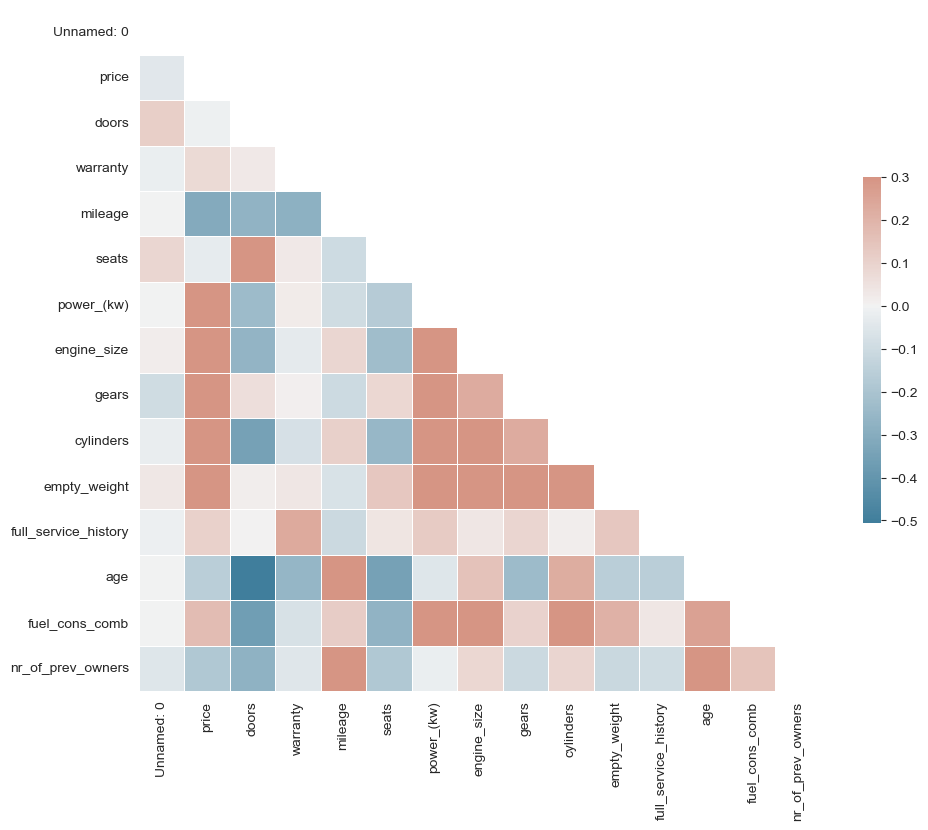

In [ ]:

# Calculate correlation matrix
corr = df.corr()

# Create a mask to ignore self-
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# fill_na_with_2to1mode calculates the mode first based on the first two arguments, if there is no mode, then based on the first argument, and if there is no mode then on the mode for the third argument

def fill_na_with_2to1mode(df, column_to_groupby1, column_to_groupby2, column_to_fill):
    for group1 in df[column_to_groupby1].unique():
        for group2 in df[column_to_groupby2].unique():
            cond1 = (df[column_to_groupby1]==group1) & (df[column_to_groupby2]==group2)
            cond2 = (df[column_to_groupby1]==group1)

            # Rows with NaN in 'column_to_fill' before filling
            before_filling = df.loc[cond1 & df[column_to_fill].isna()]
            if not before_filling.empty:
                print("Before filling:")
                print(before_filling)

            # Fill NaN values
            mode1 = list(df[cond1][column_to_fill].mode())
            mode2 = list(df[cond2][column_to_fill].mode())
            if mode1 != []:
                df.loc[cond1, column_to_fill] = df.loc[cond1, column_to_fill].fillna(df[cond1][column_to_fill].mode()[0])
            elif mode2 != []:
                df.loc[cond2, column_to_fill] = df.loc[cond2, column_to_fill].fillna(df[cond2][column_to_fill].mode()[0])
            else:
                df[column_to_fill] = df[column_to_fill].fillna(df[column_to_fill].mode()[0])

            # Rows after filling
            after_filling = df.loc[before_filling.index]
            if not after_filling.empty:
                print("After filling:")
                print(after_filling)

    print(df[column_to_fill].value_counts(dropna=False))

In [ ]:
def fill_na_with_3to1mode(df, column_to_groupby1, column_to_groupby2, column_to_groupby3, column_to_fill):
    for group1 in df[column_to_groupby1].unique():
        for group2 in df[column_to_groupby2].unique():
            for group3 in df[column_to_groupby3].unique():
                cond1 = (df[column_to_groupby1]==group1) & (df[column_to_groupby2]==group2) & (df[column_to_groupby3]==group3)
                cond2 = (df[column_to_groupby1]==group1) & (df[column_to_groupby2]==group2)
                cond3 = (df[column_to_groupby1]==group1)

                # Rows with NaN in 'column_to_fill' before filling
                before_filling = df.loc[cond1 & df[column_to_fill].isna()]
                if not before_filling.empty:
                    print("Before filling:")
                    print(before_filling)

                # Fill NaN values
                mode1 = list(df[cond1][column_to_fill].mode())
                mode2 = list(df[cond2][column_to_fill].mode())
                mode3 = list(df[cond3][column_to_fill].mode())
                if mode1 != []:
                    df.loc[cond1, column_to_fill] = df.loc[cond1, column_to_fill].fillna(df[cond1][column_to_fill].mode()[0])
                elif mode2 != []:
                    df.loc[cond2, column_to_fill] = df.loc[cond2, column_to_fill].fillna(df[cond2][column_to_fill].mode()[0])
                elif mode3 != []:
                    df.loc[cond3, column_to_fill] = df.loc[cond3, column_to_fill].fillna(df[cond3][column_to_fill].mode()[0])
                else:
                    df[column_to_fill] = df[column_to_fill].fillna(df[column_to_fill].mode()[0])

                # Rows after filling
                after_filling = df.loc[before_filling.index]
                if not after_filling.empty:
                    print("After filling:")
                    print(after_filling)

    print(df[column_to_fill].value_counts(dropna=False))

make_model vs make : Filling in models in model_make where there are only makes (§make_model, §make)


In [ ]:
pd.set_option('display.max_rows', 700)  # |
pd.set_option('display.max_columns', None)   # |
# df.make_model.value_counts()

pd.set_option('display.max_columns', None)



toyota_df = df[df['make_model'] == 'Toyota']
toyota_df

,Unnamed: 0,make_model,short_description,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,co₂-emissions,manufacturer_colour,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners
1166,18071,Toyota,X-MODE Comfort- und Technik-Paket,Toyota,DE,61485.000,Off-Road/Pick-up,Demonstration,5.000,12.000,1500.000,Automatic,NaN,Dealer,5.000,160.000,NaN,1.000,NaN,Lackierung: Zweifarb-Lackierun,4WD,NaN,"360° camera, Air conditioning, Armrest, Automa...","Android Auto, Apple CarPlay, Bluetooth, Digita...","Adaptive Cruise Control, Alarm system, Blind s...","Alloy wheels (20""), Ambient lighting, Automati...",2085.000,1.000,NaN,Other,0.000,NaN,1.000
1698,17560,Toyota,"GR Supra Dynamic Kamera,Navigation, Sitzhzg.",Toyota,DE,51990.000,Coupe,Demonstration,2.000,60.000,20.000,Automatic,Benzine,Dealer,2.000,190.000,1998.000,8.000,143 g/km (comb.),Lightning Yellow,NaN,4.000,"Air conditioning, Automatic climate control, 2...","Bluetooth, Digital radio, Hands-free equipment...","ABS, Adaptive Cruise Control, Adaptive headlig...","Alloy wheels, Automatically dimming interior m...",1470.000,1.000,Euro 6,alcantara,0.000,6.300,1.000
3175,18327,Toyota,"RAV 2.5 Hybrid PlugIn 4x4 Technik-P., Klimaaut...",Toyota,DE,46990.000,Off-Road/Pick-up,Demonstration,5.000,60.000,21500.000,Automatic,Benzine,Dealer,5.000,225.000,2487.000,1.000,26 g/km (comb.),Lichtsilber Metallic,4WD,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Alarm system, Ce...","Alloy wheels, Automatically dimming interior m...",1950.000,1.000,Euro 6,Cloth,1.000,1.200,1.000
6935,17837,Toyota,GR Supra 3.0 LEGEND,Toyota,IT,71400.000,Coupe,Used,2.000,NaN,13667.000,Automatic,Benzine,Dealer,2.000,250.000,2998.000,NaN,170 g/km (comb.),Rosso,Rear,6.000,"Air conditioning, Air suspension, Armrest, Cru...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Alarm system, Ce...","Alloy wheels, Touch screen",1470.000,0.000,Euro 6,Full leather,2.000,7.500,NaN
7361,18577,Toyota,1.5D 96kW (130CV) Family Active L1,Toyota,ES,21990.000,Station wagon,Used,5.000,12.000,49360.000,Manual,Diesel,Dealer,NaN,96.000,1500.000,NaN,NaN,Blanco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,2.000,4.200,NaN
12651,18524,Toyota,Auris Touring Sports 1.8 Hybrid Active,Toyota,IT,16400.000,Station wagon,Used,5.000,12.000,92790.000,Automatic,NaN,Dealer,5.000,73.000,1798.000,NaN,83 g/km (comb.),Gray Metallic,Front,4.000,"Air conditioning, Armrest, Cruise control, Ele...","Bluetooth, Radio","ABS, Central door lock, Electronic stability c...",Alloy wheels,1410.000,0.000,Euro 6,Cloth,4.000,3.600,NaN
16534,18512,Toyota,Auris Touring Sports 1.6 D-4D Active,Toyota,IT,16000.000,Station wagon,Used,5.000,NaN,105500.000,Manual,Diesel,Dealer,5.000,82.000,1598.000,6.000,108 g/km (comb.),Bianco,Front,4.000,"Air conditioning, Armrest, Cruise control, Ele...","Bluetooth, Radio","ABS, Central door lock, Electronic stability c...",Alloy wheels,1395.000,0.000,Euro 6,Cloth,6.000,4.200,NaN
22406,17466,Toyota,1.8-16v VVT-i,Toyota,NL,11900.000,Convertible,Used,2.000,NaN,57317.000,Manual,Benzine,Dealer,2.000,103.000,1794.000,6.000,178 g/km (comb.),NaN,NaN,4.000,"Air conditioning, Leather steering wheel, Powe...","CD player, On-board computer","Central door lock with remote control, Driver-...","Alloy wheels (16"")",990.000,1.000,Euro 3,NaN,17.000,7.400,NaN
22942,17514,Toyota,1.8 16v VVT-i Special edition semiautomaat,Toyota,NL,14250.000,Convertible,Used,2.000,NaN,108839.000,Semi-automatic,Benzine,Dealer,2.000,103.000,1794.000,NaN,178 g/km (comb.),NaN,NaN,4.000,"Air conditioning, Armrest, Leather steering wh...","CD player, On-board computer","ABS, Central door lock with remote control, Dr...","Alloy wheels (16""), Sport seats",NaN,1.000,Euro 3,F

In [ ]:
df.groupby("make")["make_model"].value_counts(dropna=False)

make           make_model              
Dacia          Dacia Sandero               486
               Dacia Duster                311
               Dacia Logan                 159
               Dacia Lodgy                  49
               Dacia Dokker                 47
               Dacia Spring                 38
               Dacia Jogger                 32
               Dacia                         5
               Dacia Break                   1
Fiat           Fiat 500                    410
               Fiat Tipo                   321
               Fiat 500X                   318
               Fiat 500C                   189
               Fiat Coupe                  160
               Fiat Panda                  110
               Fiat 500L                    59
               Fiat 124 Spider              52
               Fiat 500e                    49
               Fiat Punto                   42
               Fiat Barchetta               33
               Fiat 

In [ ]:
# List of brands
brands = ["Ford", "Toyota", "Renault", "Hyundai", "Nissan", "Dacia", "SEAT", "Skoda", "Fiat", "Opel"]

# Step 1: Replace the corresponding rows in 'make_model' with NaN
for brand in brands:
    df.loc[df['make_model'].str.strip() == brand, 'make_model'] = np.nan

for group in brands:
    cond = df["make"]==group
    mode = list(df[cond]["make_model"].mode())
    if mode != []:
        df.loc[cond, "make_model"] = df.loc[cond, "make_model"].fillna(df[cond]["make_model"].mode()[0])
    else:
        df.loc[cond, "make_model"] = df.loc[cond, "make_model"].fillna(df["make_model"].mode()[0])

df.groupby("make")["make_model"].value_counts(dropna=False)

make           make_model              
Dacia          Dacia Sandero               491
               Dacia Duster                311
               Dacia Logan                 159
               Dacia Lodgy                  49
               Dacia Dokker                 47
               Dacia Spring                 38
               Dacia Jogger                 32
               Dacia Break                   1
Fiat           Fiat 500                    438
               Fiat Tipo                   321
               Fiat 500X                   318
               Fiat 500C                   189
               Fiat Coupe                  160
               Fiat Panda                  110
               Fiat 500L                    59
               Fiat 124 Spider              52
               Fiat 500e                    49
               Fiat Punto                   42
               Fiat Barchetta               33
               Fiat 500 Abarth              26
               Fiat 

In [ ]:
# only Peugeot and Volvo remain as make_madels


In [ ]:
# manufacturer_colour

In [ ]:
first_looking("manufacturer_colour")

COLUMN NAME    :  manufacturer_colour
--------------------------------
per_of_nulls   :  % 26.12
num_of_nulls   :  6419
num_of_uniques :  4962
--------------------------------
NaN                             6419
Blanco                           652
Gris                             435
Grijs metallic                   331
Negro                            289
                                ... 
Negro Onyx (sólido)                1
Tiefseeblau Metallic               1
Splash Cyan Metallic               1
Colore esterno (red (solid))       1
Manhattan Grey                     1
Name: manufacturer_colour, Length: 4963, dtype: int64




In [ ]:
grouped = df.groupby('manufacturer_colour').mean()
grouped




,Unnamed: 0,price,doors,warranty,mileage,seats,power_(kw),engine_size,gears,cylinders,empty_weight,full_service_history,age,fuel_cons_comb,nr_of_prev_owners
manufacturer_colour,,,,,,,,,,,,,,,
"""Apolo"" blau",12403.000,7490.000,2.000,NaN,74500.000,5.000,63.000,1390.000,NaN,NaN,NaN,0.000,10.000,5.900,1.000
"""Bila"" Weiss",12789.000,20140.000,4.000,NaN,39800.000,5.000,110.000,1395.000,NaN,NaN,NaN,0.000,4.000,5.300,NaN
"""Boheme"" Violett",13000.000,17185.000,3.500,NaN,61103.500,5.000,110.000,1395.000,6.000,4.000,1241.000,0.000,4.500,4.900,1.500
"""Candy"" Weiss",13272.727,16989.000,4.273,12.000,53024.636,5.000,94.364,1484.545,6.143,3.857,1283.143,0.636,3.909,4.809,1.545
"""Candy"" weiss",13073.667,11283.000,4.000,12.000,87284.667,5.000,118.667,1524.000,6.000,3.500,1104.000,0.667,10.333,6.633,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwart mica,22715.000,16492.857,4.571,11.000,80942.429,4.857,96.600,1403.429,5.857,3.571,1276.571,0.286,5.857,5.471,2.000
[L5L5] Florett Silber ...,13065.000,33290.000,5.000,NaN,9450.000,5.000,221.000,1984.000,NaN,4.000,1470.000,1.000,4.000,7.200,NaN
´´candy´´ weiss,12543.000,8990.000,3.000,12.000,123000.000,NaN,63.000,1197.000,5.000,4.000,NaN,1.000,8.000,5.200,NaN


In [ ]:
# drop it, pb not very impactful

In [ ]:
df = df.drop('manufacturer_colour', axis=1)


Location (§location)

In [ ]:
first_looking("location")

COLUMN NAME    :  location
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
DE    11780
ES     4204
NL     2563
IT     2244
BE     1723
FR     1446
AT      582
LU       34
BG        1
EE        1
DK        1
Name: location, dtype: int64




In [ ]:
avg_prices = df.groupby(['make_model', 'age','location'])['price'].mean()
avg_prices.head(200)

make_model     age     location
Dacia Break    0.000   BE         20500.000
Dacia Dokker   0.000   BE         16900.000
               1.000   ES         13990.000
               2.000   DE         17250.000
                       ES         13900.000
               3.000   DE         16188.000
                       ES         15145.000
               4.000   DE         13645.333
                       ES         13020.714
                       FR         10990.000
               5.000   BE          7200.000
                       DE         11776.667
                       ES         13160.000
               6.000   ES         13240.000
               7.000   DE          6940.000
                       ES         13475.000
                       FR         15700.000
               8.000   DE          4790.000
                       ES          9990.000
               9.000   DE          5600.000
Dacia Duster   0.000   AT         21256.667
                       DE         22989.467


In [ ]:
# Group by make_model, age and location, then get average price.
avg_prices = df.groupby(['make_model', 'age', 'location'])['price'].mean()

# Reset the index to turn the indices into columns
avg_prices = avg_prices.reset_index()

# Sort by make_model, age and price (in descending order)
sorted_avg_prices = avg_prices.sort_values(['make_model', 'age', 'price'], ascending=[True, True, False])

# Drop duplicates, keeping the first (i.e. highest price) for each combination of make_model and age
highest_prices = sorted_avg_prices.drop_duplicates(subset=['make_model', 'age'])

# Keep the make_model, age, location, and price columns
highest_price_locations = highest_prices[['make_model', 'age', 'location', 'price']]



In [ ]:
highest_price_locations.head(200)

,make_model,age,location,price
0,Dacia Break,0.000,BE,20500.000
1,Dacia Dokker,0.000,BE,16900.000
2,Dacia Dokker,1.000,ES,13990.000
3,Dacia Dokker,2.000,DE,17250.000
5,Dacia Dokker,3.000,DE,16188.000
7,Dacia Dokker,4.000,DE,13645.333
12,Dacia Dokker,5.000,ES,13160.000
13,Dacia Dokker,6.000,ES,13240.000
16,Dacia Dokker,7.000,FR,15700.000
18,Dacia Dokker,8.000,ES,9990.000


In [ ]:
location_counts = highest_price_locations['location'].value_counts()


In [ ]:
location_counts

DE    1325
ES     520
NL     414
IT     351
BE     311
FR     240
AT     152
LU       7
Name: location, dtype: int64

In [ ]:
df.location.value_counts()

DE    11780
ES     4204
NL     2563
IT     2244
BE     1723
FR     1446
AT      582
LU       34
BG        1
EE        1
DK        1
Name: location, dtype: int64

In [ ]:
# Germany appears above average, Spain clearly below average

Doors (§doors)

In [ ]:
first_looking("doors")

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 1.38
num_of_nulls   :  339
num_of_uniques :  6
--------------------------------
5.000    14623
2.000     4739
4.000     2757
3.000     2114
NaN        339
6.000        5
1.000        2
Name: doors, dtype: int64




In [ ]:
# fill_na_with_3to1mode(df, 'make_model', 'body_type', 'seats', 'doors')
fill_mode(df, "make_model", "body_type", "doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    14767
2.000     4874
4.000     2770
3.000     2161
6.000        5
1.000        2
Name: doors, dtype: int64


Age (§age)

In [ ]:
first_looking("age")

COLUMN NAME    :  age
--------------------------------
per_of_nulls   :  % 0.02
num_of_nulls   :  5
num_of_uniques :  80
--------------------------------
3.000      3111
0.000      2817
4.000      2755
1.000      2601
2.000      2170
5.000      2007
6.000      1255
7.000       954
8.000       759
9.000       626
10.000      594
11.000      572
12.000      486
15.000      389
13.000      373
14.000      369
16.000      354
17.000      273
18.000      219
19.000      177
20.000      162
21.000      159
22.000      132
23.000      124
24.000       82
28.000       79
25.000       78
27.000       75
26.000       70
30.000       58
31.000       56
29.000       52
32.000       50
56.000       38
55.000       32
34.000       30
57.000       29
49.000       28
35.000       25
54.000       25
50.000       24
36.000       22
44.000       20
33.000       19
37.000       18
51.000       18
52.000       17
53.000       16
39.000       16
43.000       14
47.000       13
46.000       11
45.000       1

In [ ]:
df['age'].fillna('-', inplace=True)

In [ ]:
df[df["age"] == "-"]["mileage"].value_counts(dropna=False)

20926.000     1
59629.000     1
147985.000    1
3856.000      1
2494.000      1
Name: mileage, dtype: int64

In [ ]:
cond1 = (df['mileage'] < 10000)
cond2 = ((df['mileage'] >= 10000) & (df['mileage'] < 25000))
cond3 = ((df['mileage'] >= 25000) & (df['mileage'] < 40000))
cond4 = (df['mileage'] >= 40000)
...

df.loc[cond1,'age'] = df.loc[cond1,'age'].replace('-', 0)
df.loc[cond2,'age'] = df.loc[cond2,'age'].replace('-', 1)
df.loc[cond3,'age'] = df.loc[cond3,'age'].replace('-', 2)
df.loc[cond4,'age'] = df.loc[cond4,'age'].replace('-', 3)

In [ ]:
df.loc[cond1, 'age'] = df.loc[cond1, 'age'].replace('-', 0)

In [ ]:
df.groupby('age').mileage.mean()

age
0.000       3135.055
1.000      15061.437
2.000      30583.423
3.000      50095.341
4.000      67494.122
5.000      77600.934
6.000      82986.521
7.000      96436.619
8.000     108158.223
9.000     114446.021
10.000    121928.490
11.000    133830.983
12.000    146536.409
13.000    145521.678
14.000    155832.149
15.000    160514.231
16.000    154019.497
17.000    156970.286
18.000    168582.648
19.000    161536.503
20.000    152069.895
21.000    164569.642
22.000    143374.568
23.000    150092.218
24.000    125464.232
25.000    149659.282
26.000    141166.357
27.000    135925.240
28.000    146483.152
29.000    149477.558
30.000    134259.828
31.000    142536.357
32.000    144439.700
33.000    110092.211
34.000    132509.400
35.000    128073.960
36.000    178897.682
37.000    112710.667
38.000     96806.900
39.000     94641.875
40.000    155214.500
41.000     99538.125
42.000     93466.200
43.000     96913.786
44.000    112481.850
45.000     77356.273
46.000     69099.091
47.000   

In [ ]:
df["age"].value_counts(dropna=False)

3.000      3113
0.000      2819
4.000      2755
1.000      2602
2.000      2170
5.000      2007
6.000      1255
7.000       954
8.000       759
9.000       626
10.000      594
11.000      572
12.000      486
15.000      389
13.000      373
14.000      369
16.000      354
17.000      273
18.000      219
19.000      177
20.000      162
21.000      159
22.000      132
23.000      124
24.000       82
28.000       79
25.000       78
27.000       75
26.000       70
30.000       58
31.000       56
29.000       52
32.000       50
56.000       38
55.000       32
34.000       30
57.000       29
49.000       28
54.000       25
35.000       25
50.000       24
36.000       22
44.000       20
33.000       19
37.000       18
51.000       18
52.000       17
53.000       16
39.000       16
43.000       14
47.000       13
46.000       11
45.000       11
40.000       10
38.000       10
48.000        9
58.000        9
59.000        9
41.000        8
60.000        6
42.000        5
67.000        5
61.000  

Mileage (§mileage)

In [ ]:
first_looking('mileage')

COLUMN NAME    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14183
--------------------------------
10.000        541
1.000         164
5000.000      115
100.000       113
5.000         105
             ... 
19841.000       1
114688.000      1
8450.000        1
58553.000       1
2494.000        1
Name: mileage, Length: 14184, dtype: int64




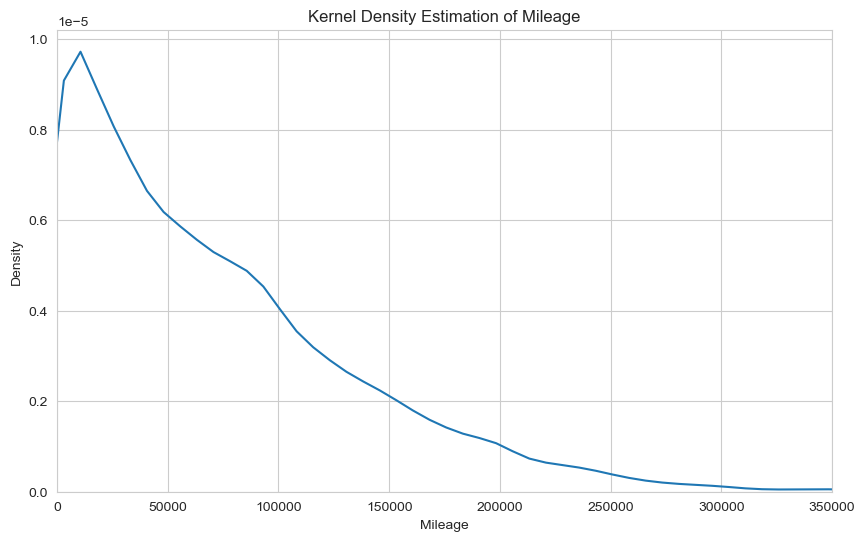

In [ ]:
# KDE plot
sns.kdeplot(df['mileage'])
plt.title('Kernel Density Estimation of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.xlim(0, 350000) # This line sets the x-axis limits
plt.show()

In [ ]:
df[df["mileage"].isna()][["make_model", "age", "mileage"]]

,make_model,age,mileage
1274,Fiat 500X,0.000,NaN


In [ ]:
nan_mileage_rows = df[df['mileage'].isna()]  # only one demonstration car
nan_mileage_rows

,Unnamed: 0,make_model,short_description,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,co₂-emissions,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners
1274,10870,Fiat 500X,1.5 Hybrid Cabrio Automaat Yacht Club Capri,Fiat,NL,41570.000,Off-Road/Pick-up,Demonstration,5.000,NaN,NaN,Automatic,NaN,Dealer,5.000,96.000,1469.000,7.000,NaN,NaN,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels, Electronic parking brake, Emerge...",1380.000,0.000,NaN,Full leather,0.000,NaN,NaN


In [ ]:
df.groupby(["make_model", "age"]).mileage.transform("mean")

0       10866.811
1       44309.600
2       75079.020
3        3310.826
4         383.833
           ...   
24574    5000.000
24575      10.000
24576   29961.000
24577    5782.250
24578    3839.677
Name: mileage, Length: 24579, dtype: float64

In [ ]:
df["mileage"].fillna(df.groupby(["make_model", "age"]).mileage.transform("mean"), inplace=True)

In [ ]:
df["mileage"].value_counts(dropna=False)

10.000        541
1.000         164
5000.000      115
100.000       113
5.000         105
             ... 
19841.000       1
114688.000      1
8450.000        1
58553.000       1
2494.000        1
Name: mileage, Length: 14184, dtype: int64

fuel_type (§fuel_type)

In [ ]:
first_looking("fuel_type")

COLUMN NAME    :  fuel_type
--------------------------------
per_of_nulls   :  % 6.41
num_of_nulls   :  1575
num_of_uniques :  4
--------------------------------
Benzine               15490
Diesel                 6994
NaN                    1575
Liquid/Natural Gas      345
Electric                175
Name: fuel_type, dtype: int64




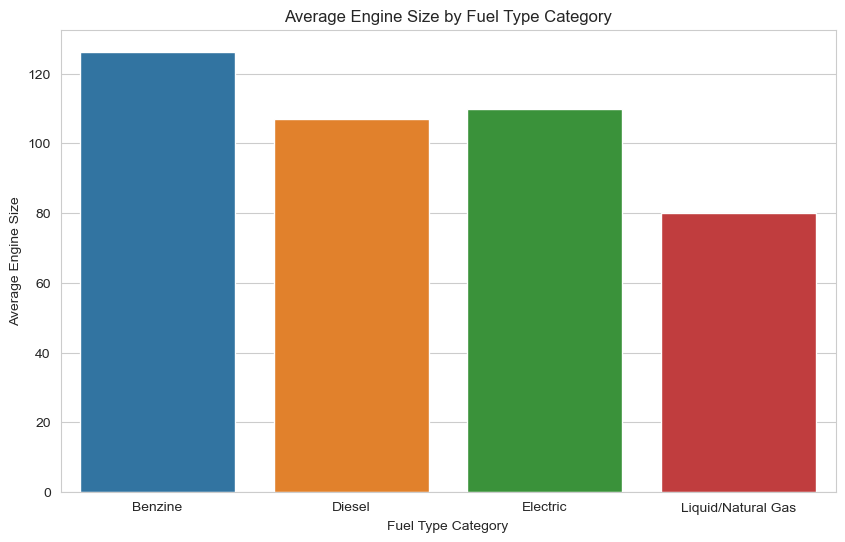

In [ ]:
mean_engine_size = df.groupby('fuel_type')['power_(kw)'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='fuel_type', y='power_(kw)', data=mean_engine_size)
plt.title('Average Engine Size by Fuel Type Category')
plt.xlabel('Fuel Type Category')
plt.ylabel('Average Engine Size')
plt.show()

In [ ]:
df["fuel_type"] = df["fuel_type"].replace('-', np.nan)

In [ ]:
fill(df, "make_model", "body_type", "fuel_type", "mode")

COLUMN NAME    :  fuel_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine               16570
Diesel                 7232
Electric                425
Liquid/Natural Gas      352
Name: fuel_type, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24579 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             24579 non-null  int64  
 1   make_model             24579 non-null  object 
 2   short_description      24374 non-null  object 
 3   make                   24579 non-null  object 
 4   location               24579 non-null  object 
 5   price                  24579 non-null  float64
 6   body_type              24579 non-null  object 
 7   type                   24579 non-null  object 
 8   doors                  24579 non-null  float64
 9   warranty               10535 non-null  float64
 10  mileage                24579 non-null  float64
 11  gearbox                24345 non-null  object 
 12  fuel_type              24579 non-null  object 
 13  seller                 24579 non-null  object 
 14  seats                  22067 non-null  float64
 15  po

seats (§seats)

In [ ]:
first_looking("seats")

COLUMN NAME    :  seats
--------------------------------
per_of_nulls   :  % 10.22
num_of_nulls   :  2512
num_of_uniques :  11
--------------------------------
5.000     15855
4.000      4669
NaN        2512
2.000      1063
7.000       349
8.000        43
9.000        35
3.000        24
6.000        12
0.000         9
1.000         6
17.000        2
Name: seats, dtype: int64




In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix["seats"])

Unnamed: 0              0.086
price                  -0.031
doors                   0.628
warranty                0.030
mileage                -0.102
seats                   1.000
power_(kw)             -0.167
engine_size            -0.232
gears                   0.083
cylinders              -0.255
empty_weight            0.135
full_service_history    0.040
fuel_cons_comb         -0.271
nr_of_prev_owners      -0.185
Name: seats, dtype: float64


In [ ]:
fill(df, "make_model", "doors", "seats", "mode")

COLUMN NAME    :  seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
0.000         9
1.000         6
2.000      1138
3.000        25
4.000      5155
5.000     17734
6.000        12
7.000       417
8.000        43
9.000        38
17.000        2
Name: seats, dtype: int64


In [ ]:
df.seats.isna().sum()

0

warranty (§warranty)

In [ ]:
first_looking("warranty")

COLUMN NAME    :  warranty
--------------------------------
per_of_nulls   :  % 57.14
num_of_nulls   :  14044
num_of_uniques :  64
--------------------------------
NaN        14044
12.000      7036
24.000      1263
60.000       935
6.000        375
36.000       213
3.000        148
0.000        131
48.000        77
84.000        47
72.000        39
8.000         19
18.000        15
13.000        13
1.000         12
30.000        12
34.000        11
33.000        11
15.000        10
14.000        10
16.000        10
21.000         9
19.000         9
32.000         9
20.000         9
23.000         9
28.000         8
35.000         8
22.000         6
50.000         6
17.000         5
42.000         5
31.000         4
26.000         4
47.000         4
52.000         4
9.000          4
11.000         3
27.000         3
25.000         3
58.000         3
10.000         2
45.000         2
7.000          2
2.000          2
51.000         2
90.000         2
80.000         2
53.000         2
29.

In [ ]:
df["warranty"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type"])["age"].describe()

count  unique   top   freq
make_model   body_type                                     
Dacia Break   Station wagon      1.000   1.000 0.000  1.000
Dacia Dokker  Compact            1.000   1.000 4.000  1.000
              Off-Road/Pick-up   2.000   1.000 4.000  2.000
              Sedan              1.000   1.000 5.000  1.000
              Station wagon     43.000  10.000 4.000 14.000
...                                ...     ...   ...    ...
Volvo XC70    Station wagon     13.000   7.000 6.000  3.000
Volvo XC90    Coupe              2.000   1.000 5.000  2.000
              Off-Road/Pick-up  96.000  15.000 5.000 19.000
              Sedan              3.000   3.000 1.000  1.000
              Station wagon      2.000   1.000 6.000  2.000

[1230 rows x 4 columns]

In [ ]:
df["age"] = df["age"].astype(float)

In [ ]:
df.groupby(["make_model", "body_type"])["age"].describe()

count  mean   std   min   25%   50%   75%  \
make_model   body_type                                                       
Dacia Break   Station wagon      1.000 0.000   NaN 0.000 0.000 0.000 0.000   
Dacia Dokker  Compact            1.000 4.000   NaN 4.000 4.000 4.000 4.000   
              Off-Road/Pick-up   2.000 4.000 0.000 4.000 4.000 4.000 4.000   
              Sedan              1.000 5.000   NaN 5.000 5.000 5.000 5.000   
              Station wagon     43.000 4.372 1.852 0.000 3.000 4.000 5.000   
...                                ...   ...   ...   ...   ...   ...   ...   
Volvo XC70    Station wagon     13.000 8.385 2.329 6.000 7.000 8.000 9.000   
Volvo XC90    Coupe              2.000 5.000 0.000 5.000 5.000 5.000 5.000   
              Off-Road/Pick-up  96.000 4.229 3.514 0.000 2.000 4.000 5.000   
              Sedan              3.000 2.667 1.528 1.000 2.000 3.000 3.500   
              Station wagon      2.000 6.000 0.000 6.000 6.000 6.000 6.000   

                                   max  
make_model   body_type                  
Dacia Break   Station wagon      0.000  
Dacia Dokker  Compact            4.000  
              Off-Road/Pick-up   4.000  
              Sedan              5.000  
              Station wagon      9.000  
...                                ...  
Volvo XC70    Station wagon     14.000  
Volvo XC90    Coupe              5.000  
              Off-Road/Pick-up  18.000  
              Sedan              4.000  
              Station wagon      6.000  

[1230 rows x 8 columns]

In [ ]:
df.loc[df["warranty"] == "-"][["make_model", "body_type", "warranty", "age"]]

,make_model,body_type,warranty,age
0,Renault Clio,Sedan,-,1.000
1,Fiat 500 Abarth,Compact,-,3.000
2,Nissan Micra,Convertible,-,3.000
3,Renault Captur,Off-Road/Pick-up,-,0.000
5,Dacia Duster,Off-Road/Pick-up,-,0.000
...,...,...,...,...
24573,Ford M,Convertible,-,93.000
24574,Ford Mustang,Convertible,-,94.000
24575,Ford Bronco,Off-Road/Pick-up,-,122.000
24576,Hyundai IONIQ,Sedan,-,122.000


In [ ]:
df.loc[df["warranty"] == "-"]["age"].value_counts(dropna=False).sort_index()

0.000      1584
1.000      1317
2.000      1013
3.000      1462
4.000      1206
5.000       911
6.000       642
7.000       514
8.000       466
9.000       422
10.000      407
11.000      409
12.000      353
13.000      302
14.000      281
15.000      309
16.000      281
17.000      216
18.000      186
19.000      154
20.000      142
21.000      141
22.000      120
23.000      109
24.000       76
25.000       76
26.000       66
27.000       71
28.000       76
29.000       48
30.000       58
31.000       55
32.000       49
33.000       17
34.000       29
35.000       25
36.000       20
37.000       18
38.000       10
39.000       16
40.000       10
41.000        8
42.000        5
43.000       14
44.000       19
45.000       11
46.000       11
47.000       13
48.000        8
49.000       28
50.000       23
51.000       17
52.000       17
53.000       16
54.000       24
55.000       31
56.000       36
57.000       28
58.000        9
59.000        9
60.000        6
61.000        5
62.000  

In [ ]:
display(df.loc[df["warranty"] == "-"]["age"].mean())

8.84605525491313

In [ ]:
def warrantyclassifier(x):
    if "-" in x:
        return "No"
    else:
        return "Yes"

df["warranty"] = df["warranty"].astype(str).apply(warrantyclassifier)

In [ ]:
first_looking("warranty")

COLUMN NAME    :  warranty
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
No     14044
Yes    10535
Name: warranty, dtype: int64




power_(kw) (§power_(kw))

In [ ]:
first_looking("power_(kw)")

COLUMN NAME    :  power_(kw)
--------------------------------
per_of_nulls   :  % 2.27
num_of_nulls   :  558
num_of_uniques :  351
--------------------------------
110.000    1736
96.000     1277
81.000      975
66.000      904
85.000      903
88.000      802
103.000     789
74.000      768
51.000      622
100.000     562
NaN         558
70.000      553
140.000     542
55.000      437
92.000      433
147.000     411
125.000     358
120.000     324
80.000      298
132.000     295
135.000     269
115.000     232
118.000     229
90.000      229
77.000      222
206.000     222
150.000     220
130.000     211
221.000     205
82.000      188
63.000      187
67.000      171
97.000      156
53.000      156
84.000      150
59.000      145
173.000     143
145.000     138
104.000     136
44.000      132
73.000      131
143.000     127
121.000     124
60.000      121
165.000     119
180.000     119
331.000     118
75.000      117
190.000     115
184.000     111
54.000      106
52.000      104
107.

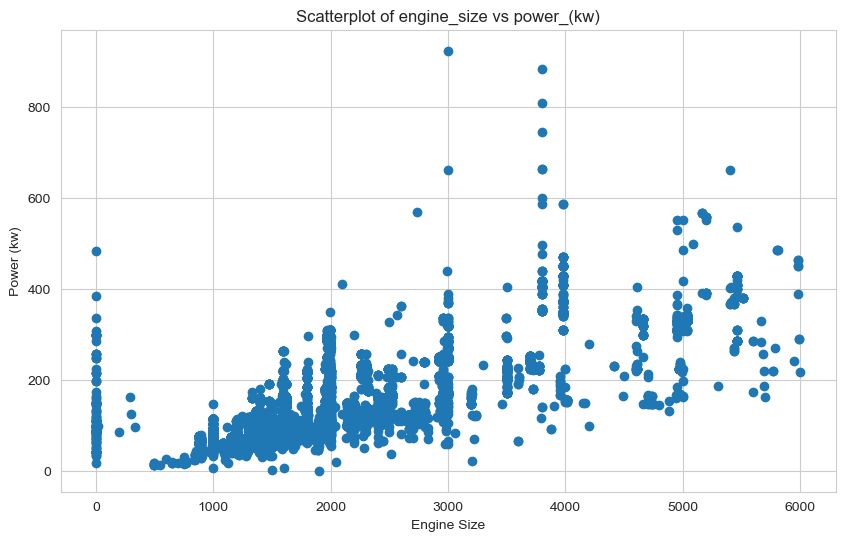

In [ ]:
import matplotlib.pyplot as plt

# Filter out values where 'engine_size' > 6000 or any column is NaN
df_no_nulls = df[(df['engine_size'].notna()) & (df['power_(kw)'].notna()) & (df['engine_size'] <= 6000)]

plt.figure(figsize=(10, 6))
plt.scatter(df_no_nulls['engine_size'], df_no_nulls['power_(kw)'])
plt.title('Scatterplot of engine_size vs power_(kw)')
plt.xlabel('Engine Size')
plt.ylabel('Power (kw)')
plt.show()



In [ ]:
df["power_(kw)"].fillna("-", inplace=True)

In [ ]:

df.groupby(["make_model", "body_type", "power_(kw)"]).price.describe()

count      mean      std  \
make_model   body_type          power_(kw)                             
Dacia Break   Station wagon     -           1.000 20500.000      NaN   
Dacia Dokker  Compact           66.0        1.000 11930.000      NaN   
              Off-Road/Pick-up  75.0        2.000 12490.000    0.000   
              Sedan             55.0        1.000  8900.000      NaN   
              Station wagon     55.0        9.000 11072.222 3177.726   
...                                           ...       ...      ...   
Volvo XC90    Off-Road/Pick-up  294.0       3.000 50793.333 7018.620   
                                300.0       1.000 44200.000      NaN   
              Sedan             173.0       2.000 48100.000  565.685   
                                223.0       1.000 84900.000      NaN   
              Station wagon     165.0       2.000 32750.000 4596.194   

                                                 min       25%       50%  \
make_model   body_type          power_(kw)                                 
Dacia Break   Station wagon     -          20500.000 20500.000 20500.000   
Dacia Dokker  Compact           66.0       11930.000 11930.000 11930.000   
              Off-Road/Pick-up  75.0       12490.000 12490.000 12490.000   
              Sedan             55.0        8900.000  8900.000  8900.000   
              Station wagon     55.0        4790.000  9990.000 12490.000   
...                                              ...       ...       ...   
Volvo XC90    Off-Road/Pick-up  294.0      42790.000 48240.000 53690.000   
                                300.0      44200.000 44200.000 44200.000   
              Sedan             173.0      47700.000 47900.000 48100.000   
                                223.0      84900.000 84900.000 84900.000   
              Station wagon     165.0      29500.000 31125.000 32750.000   

                                                 75%       max  
make_model   body_type          power_(kw)                      
Dacia Break   Station wagon     -          20500.000 20500.000  
Dacia Dokker  Compact           66.0       11930.000 11930.000  
              Off-Road/Pick-up  75.0       12490.000 12490.000  
              Sedan             55.0        8900.000  8900.000  
              Station wagon     55.0       12690.000 14500.000  
...                                              ...       ...  
Volvo XC90    Off-Road/Pick-up  294.0      54795.000 55900.000  
                                300.0      44200.000 44200.000  
              Sedan             173.0      48300.000 48500.000  
                                223.0      84900.000 84900.000  
              Station wagon     165.0      34375.000 36000.000  

[5007 rows x 8 columns]

In [ ]:
df.loc[df["power_(kw)"] == "-"][["make_model", "body_type", "power_(kw)", "engine_size", "fuel_type"]]

,make_model,body_type,power_(kw),engine_size,fuel_type
0,Renault Clio,Sedan,-,999.000,Liquid/Natural Gas
34,Toyota Yaris,Compact,-,1490.000,Benzine
290,Toyota C-HR,Coupe,-,NaN,Benzine
439,Peugeot 301,Sedan,-,NaN,Benzine
497,Mercedes-Benz CL,Compact,-,1332.000,Benzine
499,Hyundai i30,Station wagon,-,998.000,Benzine
520,Mercedes-Benz CL,Compact,-,1332.000,Benzine
870,Peugeot 208,Sedan,-,1199.000,Benzine
927,Peugeot 208,Sedan,-,1199.000,Benzine
953,Dacia Duster,Off-Road/Pick-up,-,999.000,Liquid/Natural Gas


In [ ]:
df["power_(kw)"].replace(["-"], np.nan, inplace=True)

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix["power_(kw)"])

Unnamed: 0             -0.002
price                   0.671
doors                  -0.234
mileage                -0.095
seats                  -0.171
power_(kw)              1.000
engine_size             0.579
gears                   0.381
cylinders               0.687
empty_weight            0.617
full_service_history    0.125
age                    -0.054
fuel_cons_comb          0.427
nr_of_prev_owners      -0.018
Name: power_(kw), dtype: float64


In [ ]:
fill(df, "make_model", "body_type", "power_(kw)", "mode")

COLUMN NAME    :  power_(kw)
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  351
--------------------------------
1.000         5
3.000         1
4.000         5
6.000         1
7.000         2
8.000         3
9.000         2
10.000        1
12.000        2
13.000       10
14.000        2
15.000        1
16.000        1
17.000        5
18.000        7
19.000        2
20.000        1
21.000        2
22.000        1
23.000        2
24.000        1
25.000        4
26.000        1
27.000        1
29.000        3
30.000        1
31.000        2
32.000        5
33.000       41
34.000        2
35.000        9
36.000        3
37.000        6
38.000        3
39.000        1
40.000       22
41.000        1
42.000        1
43.000       53
44.000      134
45.000        4
46.000        3
47.000       10
48.000       33
49.000       78
50.000      100
51.000      629
52.000      104
53.000      164
54.000      106
55.000      445
56.000       15
57.000 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24579 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             24579 non-null  int64  
 1   make_model             24579 non-null  object 
 2   short_description      24374 non-null  object 
 3   make                   24579 non-null  object 
 4   location               24579 non-null  object 
 5   price                  24579 non-null  float64
 6   body_type              24579 non-null  object 
 7   type                   24579 non-null  object 
 8   doors                  24579 non-null  float64
 9   warranty               24579 non-null  object 
 10  mileage                24579 non-null  float64
 11  gearbox                24345 non-null  object 
 12  fuel_type              24579 non-null  object 
 13  seller                 24579 non-null  object 
 14  seats                  24579 non-null  float64
 15  po

engine_size (§engine_size)

In [ ]:
first_looking("engine_size")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 5.2
num_of_nulls   :  1279
num_of_uniques :  467
--------------------------------
1598.000     1941
999.000      1826
NaN          1279
1969.000      965
1998.000      940
1461.000      933
998.000       849
1199.000      838
1498.000      706
1997.000      623
1968.000      594
1332.000      503
1984.000      422
1499.000      379
1798.000      377
1197.000      355
1995.000      348
1991.000      345
898.000       343
1560.000      341
1242.000      320
1248.000      268
1368.000      265
2143.000      232
1364.000      221
3982.000      200
1950.000      199
5038.000      187
1591.000      186
1956.000      185
1600.000      179
1395.000      167
2435.000      158
3498.000      157
1796.000      154
1500.000      153
2000.000      149
1198.000      148
2996.000      143
1987.000      141
1398.000      141
1149.000      138
1999.000      126
1490.000      126
1496.000      123
1794.000      122
3696.00

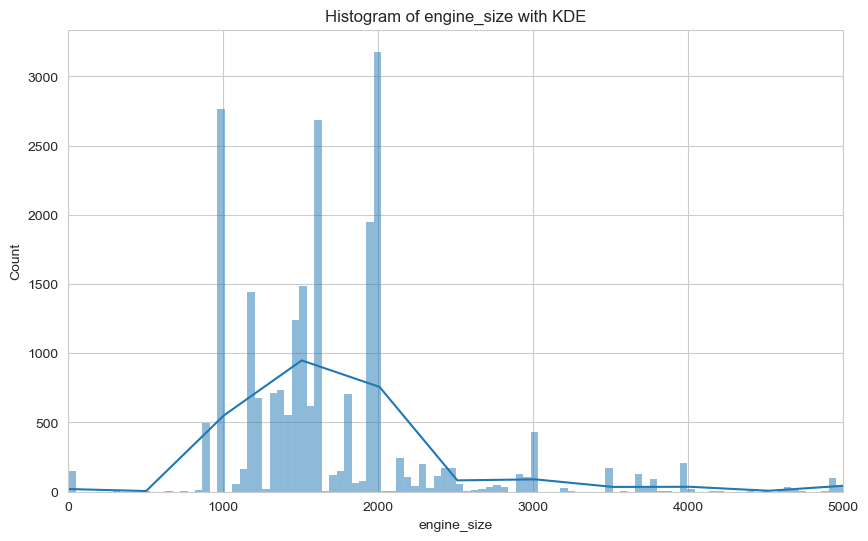

In [ ]:
df = df[df['engine_size'].notna()]

# Create the histogram with KDE
sns.histplot(df['engine_size'], kde=True)

# Customize the plot
plt.title('Histogram of engine_size with KDE')
plt.xlabel('engine_size')
plt.xlim(0, 5000)  # Limit the x-axis

# Show the plot
plt.show()

In [ ]:
df["engine_size"].fillna("-", inplace=True)

In [ ]:
df["engine_size"].replace("-", np.nan, inplace=True)

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix["engine_size"])

Unnamed: 0              0.019
price                   0.328
doors                  -0.265
mileage                 0.086
seats                  -0.188
power_(kw)              0.578
engine_size             1.000
gears                   0.226
cylinders               0.786
empty_weight            0.513
full_service_history    0.038
age                     0.150
fuel_cons_comb          0.340
nr_of_prev_owners       0.084
Name: engine_size, dtype: float64


In [ ]:
fill(df, "make_model", "cylinders", "engine_size", "mode")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  467
--------------------------------
0.000         104
1.000          30
2.000           8
4.000           2
5.000           2
20.000          1
200.000         1
289.000         1
300.000         1
332.000         1
498.000         1
499.000         4
500.000         2
549.000         1
600.000         1
650.000         2
652.000         2
698.000         1
750.000         2
767.000         3
839.000         1
843.000         6
847.000         1
850.000         4
875.000       108
898.000       343
899.000        13
900.000        30
903.000         2
964.000         3
973.000         2
982.000         1
987.000         1
988.000         1
996.000         2
997.000         1
998.000       849
999.000      1826
1000.000       80
1084.000       38
1086.000       14
1089.000        1
1100.000        5
1108.000       10
1116.000        2
1119.000        1
1120.000  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23149 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po

gears (§gears)

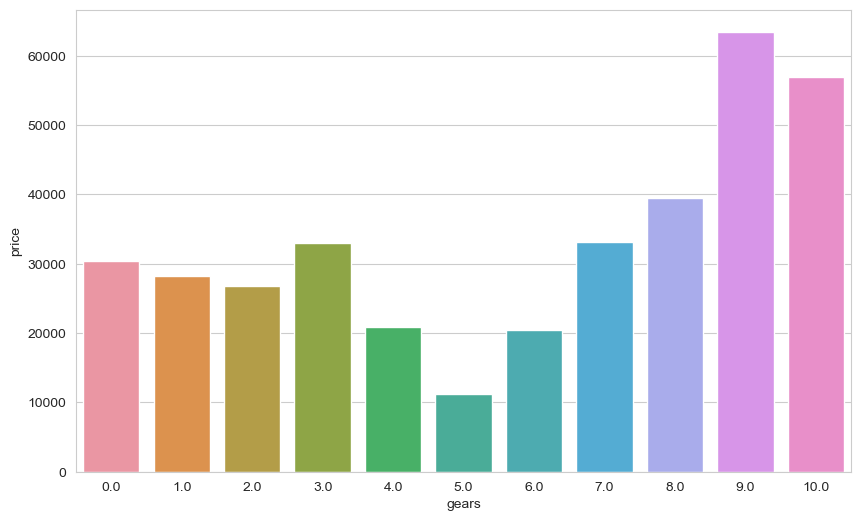

In [ ]:
sns.barplot(x=df.groupby('gears')['price'].mean().index, y =df.groupby('gears')['price'].mean());

In [ ]:
first_looking("gears")

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 32.58
num_of_nulls   :  7592
num_of_uniques :  11
--------------------------------
NaN       7592
6.000     6982
5.000     4469
7.000     1626
8.000     1260
9.000      608
1.000      431
4.000      198
10.000      91
0.000       25
3.000       17
2.000        1
Name: gears, dtype: int64




In [ ]:
df.corr()['gears'].sort_values(ascending=False)


gears                   1.000
empty_weight            0.444
power_(kw)              0.407
price                   0.396
engine_size             0.226
cylinders               0.225
full_service_history    0.105
fuel_cons_comb          0.100
seats                   0.079
doors                   0.072
Unnamed: 0             -0.113
nr_of_prev_owners      -0.135
mileage                -0.152
age                    -0.277
Name: gears, dtype: float64

In [ ]:
df["gears"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "gearbox", "gears"]).price.describe()

count      mean  \
make_model   body_type          gearbox        gears                    
Dacia Dokker  Compact           Manual         -      1.000 11930.000   
              Off-Road/Pick-up  Manual         -      2.000 12490.000   
              Station wagon     Manual         5.0   17.000 13079.235   
                                               6.0    2.000 14615.000   
                                               -     22.000 13161.000   
...                                                     ...       ...   
Volvo XC90    Off-Road/Pick-up  Manual         6.0    1.000  6799.000   
                                               -      1.000  7600.000   
              Sedan             Automatic      -      2.000 48100.000   
              Station wagon     Automatic      8.0    1.000 29500.000   
                                Semi-automatic 8.0    1.000 36000.000   

                                                          std       min  \
make_model   body_type          gearbox        gears                      
Dacia Dokker  Compact           Manual         -          NaN 11930.000   
              Off-Road/Pick-up  Manual         -        0.000 12490.000   
              Station wagon     Manual         5.0   4207.236  4790.000   
                                               6.0   3726.453 11980.000   
                                               -     3179.650  3890.000   
...                                                       ...       ...   
Volvo XC90    Off-Road/Pick-up  Manual         6.0        NaN  6799.000   
                                               -          NaN  7600.000   
              Sedan             Automatic      -      565.685 47700.000   
              Station wagon     Automatic      8.0        NaN 29500.000   
                                Semi-automatic 8.0        NaN 36000.000   

                                                           25%       50%  \
make_model   body_type          gearbox        gears                       
Dacia Dokker  Compact           Manual         -     11930.000 11930.000   
              Off-Road/Pick-up  Manual         -     12490.000 12490.000   
              Station wagon     Manual         5.0   11499.000 13680.000   
                                               6.0   13297.500 14615.000   
                                               -     11990.000 13487.500   
...                                                        ...       ...   
Volvo XC90    Off-Road/Pick-up  Manual         6.0    6799.000  6799.000   
                                               -      7600.000  7600.000   
              Sedan             Automatic      -     47900.000 48100.000   
              Station wagon     Automatic      8.0   29500.000 29500.000   
                                Semi-automatic 8.0   36000.000 36000.000   

                                                           75%       max  
make_model   body_type          gearbox        gears                      
Dacia Dokker  Compact           Manual         -     11930.000 11930.000  
              Off-Road/Pick-up  Manual         -     12490.000 12490.000  
              Station wagon     Manual         5.0   15980.000 19980.000  
                                               6.0   15932.500 17250.000  
                                               -     14867.500 19997.000  
...                                                        ...       ...  
Volvo XC90    Off-Road/Pick-up  Manual         6.0    6799.000  6799.000  
                                               -      7600.000  7600.000  
              Sedan             Automatic      -     48300.000 48500.000  
              Station wagon     Automatic      8.0   29500.000 29500.000  
                                Semi-automatic 8.0   36000.000 36000.000  

[2962 rows x 8 columns]

In [ ]:
df["gears"].replace("-", np.nan, inplace=True)

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix["gears"])

Unnamed: 0             -0.113
price                   0.396
doors                   0.072
mileage                -0.152
seats                   0.079
power_(kw)              0.407
engine_size             0.226
gears                   1.000
cylinders               0.225
empty_weight            0.444
full_service_history    0.105
age                    -0.277
fuel_cons_comb          0.100
nr_of_prev_owners      -0.135
Name: gears, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23149 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po

In [ ]:
for group1 in df["make_model"].unique():
    for group2 in df["body_type"].unique():
        for group3 in df["gearbox"].unique():
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (df["body_type"] == group2) & (df["gearbox"] == group3)
            mode1 = list(df[cond1]["gears"].mode())
            mode2 = list(df[cond2]["gears"].mode())
            mode3 = list(df[cond3]["gears"].mode())
            if mode3 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond3]["gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond2]["gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond1]["gears"].mode()[0])
            else:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df["gears"].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23149 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po

In [ ]:
df['gears'] = df['gears'].fillna(df['gears'].mode()[0])


In [ ]:
df.info() # However, there have still been some (196) missing values for gears
# and WHY❓ Wenn in einer bestimmten Gruppe (wie definiert durch die Kombination von 'make_model', 'body_type' und 'gearbox')
# keine häufigsten Werte existieren (zum Beispiel, wenn alle Werte in dieser Gruppe fehlen oder es keinen einzelnen häufigsten
# Wert gibt), dann bleibt der fehlende Wert in 'gears' unverändert.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23149 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po


gearbox (§gearbox)

In [ ]:
first_looking("gearbox")

COLUMN NAME    :  gearbox
--------------------------------
per_of_nulls   :  % 0.65
num_of_nulls   :  151
num_of_uniques :  3
--------------------------------
Manual            14094
Automatic          8993
NaN                 151
Semi-automatic       62
Name: gearbox, dtype: int64




In [ ]:
fill(df, "make_model", "body_type", "gearbox", "mode")

COLUMN NAME    :  gearbox
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
Automatic          9045
Manual            14193
Semi-automatic       62
Name: gearbox, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23300 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po

drivetrain (§drivetrain)

In [ ]:
first_looking("drivetrain")

COLUMN NAME    :  drivetrain
--------------------------------
per_of_nulls   :  % 41.2
num_of_nulls   :  9600
num_of_uniques :  3
--------------------------------
 Front     9689
NaN        9600
 4WD       2693
 Rear      1318
Name: drivetrain, dtype: int64




<AxesSubplot:xlabel='drivetrain', ylabel='doors'>

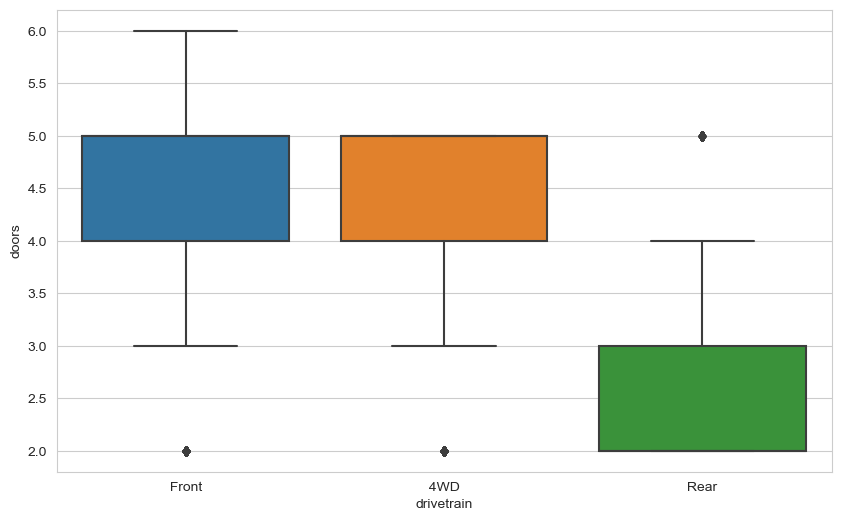

In [ ]:
sns.boxplot(x='drivetrain', y='doors', data=df)


In [ ]:
# Gruppieren Sie die Daten nach Automodell und Antriebsart und zählen Sie die Einträge
drivetrain_counts = df.groupby(['make_model', 'drivetrain']).size()

# Finden Sie Modelle, die sowohl mit Vorder- als auch Hinterradantrieb verfügbar sind
both_drivetrains = drivetrain_counts.unstack().dropna()

# Ausgabe der Modelle
print(both_drivetrains.index.tolist())


['Dacia Duster', 'Fiat Panda', 'Ford Mustang', 'Mercedes-Benz', 'Mercedes-Benz A 250', 'Mercedes-Benz C 220', 'Mercedes-Benz CLA 200', 'Mercedes-Benz CLA 250', 'Mercedes-Benz E 250', 'Nissan Qashqai', 'Opel GT', 'Renault Megane', 'SEAT Leon', 'Toyota Celica', 'Toyota MR 2', 'Toyota Yaris', 'Volvo C70', 'Volvo S90', 'Volvo V70']


In [ ]:
avg_price_per_drivetrain = df.groupby('drivetrain')['price'].mean()
print(avg_price_per_drivetrain)


drivetrain
 4WD      48433.817
 Front    17077.409
 Rear     37688.007
Name: price, dtype: float64


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix["engine_size"])

Unnamed: 0              0.019
price                   0.328
doors                  -0.265
mileage                 0.086
seats                  -0.188
power_(kw)              0.578
engine_size             1.000
gears                   0.191
cylinders               0.786
empty_weight            0.513
full_service_history    0.038
age                     0.150
fuel_cons_comb          0.340
nr_of_prev_owners       0.084
Name: engine_size, dtype: float64


In [ ]:
fill(df, "make_model", "body_type", "drivetrain", "mode")

COLUMN NAME    :  drivetrain
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
 4WD        3431
 Front     17522
 Rear       2347
Name: drivetrain, dtype: int64


cylinders (§cylinders)

In [ ]:
fill(df, "make_model", "body_type", "cylinders", "mode")

COLUMN NAME    :  cylinders
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
0.000        41
1.000        24
2.000        99
3.000      4330
4.000     16310
5.000       513
6.000      1185
7.000         2
8.000       784
12.000       11
16.000        1
Name: cylinders, dtype: int64


empty_weight (§empty_weight)

In [ ]:
first_looking("empty_weight")

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 36.24
num_of_nulls   :  8445
num_of_uniques :  1202
--------------------------------
NaN         8445
1055.000     219
1395.000     216
1165.000     187
1280.000     170
            ... 
983.000        1
918.000        1
854.000        1
2146.000       1
1857.000       1
Name: empty_weight, Length: 1203, dtype: int64




In [ ]:
df["empty_weight"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "empty_weight"]).price.describe()

count      mean       std  \
make_model   body_type          empty_weight                              
Dacia Dokker  Compact           -             1.000 11930.000       NaN   
              Off-Road/Pick-up  -             2.000 12490.000     0.000   
              Station wagon     1165.0        1.000  5600.000       NaN   
                                1205.0        1.000 15700.000       NaN   
                                1224.0        2.000 13739.500  3168.545   
...                                             ...       ...       ...   
Volvo XC90    Off-Road/Pick-up  2395.0        1.000 76930.000       NaN   
                                -            35.000 48820.200 19558.477   
              Sedan             -             2.000 48100.000   565.685   
              Station wagon     1931.0        1.000 29500.000       NaN   
                                2028.0        1.000 36000.000       NaN   

                                                   min       25%       50%  \
make_model   body_type          empty_weight                                 
Dacia Dokker  Compact           -            11930.000 11930.000 11930.000   
              Off-Road/Pick-up  -            12490.000 12490.000 12490.000   
              Station wagon     1165.0        5600.000  5600.000  5600.000   
                                1205.0       15700.000 15700.000 15700.000   
                                1224.0       11499.000 12619.250 13739.500   
...                                                ...       ...       ...   
Volvo XC90    Off-Road/Pick-up  2395.0       76930.000 76930.000 76930.000   
                                -             7500.000 37740.000 47900.000   
              Sedan             -            47700.000 47900.000 48100.000   
              Station wagon     1931.0       29500.000 29500.000 29500.000   
                                2028.0       36000.000 36000.000 36000.000   

                                                   75%       max  
make_model   body_type          empty_weight                      
Dacia Dokker  Compact           -            11930.000 11930.000  
              Off-Road/Pick-up  -            12490.000 12490.000  
              Station wagon     1165.0        5600.000  5600.000  
                                1205.0       15700.000 15700.000  
                                1224.0       14859.750 15980.000  
...                                                ...       ...  
Volvo XC90    Off-Road/Pick-up  2395.0       76930.000 76930.000  
                                -            60745.000 83900.000  
              Sedan             -            48300.000 48500.000  
              Station wagon     1931.0       29500.000 29500.000  
                                2028.0       36000.000 36000.000  

[7138 rows x 8 columns]

In [ ]:
df["empty_weight"].replace("-", np.nan, inplace=True)

In [ ]:


fill(df, "make_model", "body_type", "empty_weight", "mode")


COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1202
--------------------------------
525.000      1
600.000      4
650.000      1
670.000      1
680.000      4
            ..
2725.000     1
2750.000     1
2900.000     1
3150.000     1
11246.000    1
Name: empty_weight, Length: 1202, dtype: int64


emission_class (§emission_class)

In [ ]:
# df = df.drop('co₂-emissions', axis=1)

In [ ]:
first_looking("emission_class")

COLUMN NAME    :  emission_class
--------------------------------
per_of_nulls   :  % 30.62
num_of_nulls   :  7135
num_of_uniques :  6
--------------------------------
Euro 6    11654
NaN        7135
Euro 5     2223
Euro 4     1496
Euro 3      445
Euro 2      192
Euro 1      155
Name: emission_class, dtype: int64




In [ ]:
for group in df["make_model"].unique():
    # Define the condition for the group
    cond = df["make_model"] == group

    # Get the mode of the 'emission_class' for the group
    mode = df.loc[cond, "emission_class"].mode()

    # If the mode exists (the series is not empty), fill the NaNs in the 'emission_class' column with the group mode
    if not mode.empty:
        df.loc[cond, "emission_class"] = df.loc[cond, "emission_class"].fillna(mode.iloc[0])
    # If the mode does not exist (the series is empty), fill the NaNs in the 'emission_class' column with the global mode
    else:
        df["emission_class"] = df["emission_class"].fillna(df["emission_class"].mode().iloc[0])

# Print the DataFrame information to check the results
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23300 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po

upholstery (§upholstery)

In [ ]:
first_looking('upholstery')

COLUMN NAME    :  upholstery
--------------------------------
per_of_nulls   :  % 29.69
num_of_nulls   :  6917
num_of_uniques :  6
--------------------------------
Cloth           7935
NaN             6917
Full leather    4493
Part leather    2489
alcantara        710
Other            564
Velour           192
Name: upholstery, dtype: int64




In [ ]:
df["upholstery"].replace(["Velour", "alcantara", "Part leather", "Full leather"],
                         ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

df["upholstery"].replace("Other", np.nan, inplace=True)

df["upholstery"].value_counts(dropna=False)

Cloth                8127
Part/Full Leather    7692
NaN                  7481
Name: upholstery, dtype: int64

In [ ]:
df["upholstery"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "age", "upholstery"]).price.describe()

count      mean  \
make_model   body_type          age    upholstery                           
Dacia Dokker  Compact           4.000  -                  1.000 11930.000   
              Off-Road/Pick-up  4.000  Cloth              2.000 12490.000   
              Station wagon     0.000  Cloth              1.000 16900.000   
                                1.000  -                  1.000 13990.000   
                                2.000  -                  1.000 17250.000   
...                                                         ...       ...   
Volvo XC90    Off-Road/Pick-up  16.000 Part/Full Leather  1.000 16990.000   
                                18.000 -                  1.000  6799.000   
              Sedan             3.000  -                  1.000 48500.000   
                                4.000  -                  1.000 47700.000   
              Station wagon     6.000  Part/Full Leather  2.000 32750.000   

                                                              std       min  \
make_model   body_type          age    upholstery                             
Dacia Dokker  Compact           4.000  -                      NaN 11930.000   
              Off-Road/Pick-up  4.000  Cloth                0.000 12490.000   
              Station wagon     0.000  Cloth                  NaN 16900.000   
                                1.000  -                      NaN 13990.000   
                                2.000  -                      NaN 17250.000   
...                                                           ...       ...   
Volvo XC90    Off-Road/Pick-up  16.000 Part/Full Leather      NaN 16990.000   
                                18.000 -                      NaN  6799.000   
              Sedan             3.000  -                      NaN 48500.000   
                                4.000  -                      NaN 47700.000   
              Station wagon     6.000  Part/Full Leather 4596.194 29500.000   

                                                               25%       50%  \
make_model   body_type          age    upholstery                              
Dacia Dokker  Compact           4.000  -                 11930.000 11930.000   
              Off-Road/Pick-up  4.000  Cloth             12490.000 12490.000   
              Station wagon     0.000  Cloth             16900.000 16900.000   
                                1.000  -                 13990.000 13990.000   
                                2.000  -                 17250.000 17250.000   
...                                                            ...       ...   
Volvo XC90    Off-Road/Pick-up  16.000 Part/Full Leather 16990.000 16990.000   
                                18.000 -                  6799.000  6799.000   
              Sedan             3.000  -                 48500.000 48500.000   
                                4.000  -                 47700.000 47700.000   
              Station wagon     6.000  Part/Full Leather 31125.000 32750.000   

                                                               75%       max  
make_model   body_type          age    upholstery                             
Dacia Dokker  Compact           4.000  -                 11930.000 11930.000  
              Off-Road/Pick-up  4.000  Cloth             12490.000 12490.000  
              Station wagon     0.000  Cloth             16900.000 16900.000  
                                1.000  -                 13990.000 13990.000  
                                2.000  -                 17250.000 17250.000  
...                                                            ...       ...  
Volvo XC90    Off-Road/Pick-up  16.000 Part/Full Leather 16990.000 16990.000  
                                18.000 -                  6799.000  6799.000  
              Sedan             3.000  -                 48500.000 48500.000  
                                4.000  -                 47700.000 47700.000  
              Station wagon     6.000  

In [ ]:
df["upholstery"].replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "upholstery", "ffill")

COLUMN NAME    :  upholstery
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Cloth                12206
Part/Full Leather    11094
Name: upholstery, dtype: int64


In [ ]:
df.upholstery.value_counts()

Cloth                12206
Part/Full Leather    11094
Name: upholstery, dtype: int64

fuel_cons_comb (§fuel_cons_comb)

In [ ]:
first_looking('fuel_cons_comb')

COLUMN NAME    :  fuel_cons_comb
--------------------------------
per_of_nulls   :  % 15.38
num_of_nulls   :  3584
num_of_uniques :  161
--------------------------------
NaN       3584
4.900      708
5.000      652
4.700      578
0.000      553
5.100      552
4.800      552
5.400      533
4.500      531
5.300      507
5.200      505
4.300      493
4.200      478
4.600      471
5.600      455
5.500      446
4.100      439
5.900      433
5.700      428
4.400      373
4.000      369
6.400      369
6.000      368
3.800      365
5.800      360
6.300      315
3.900      300
3.700      275
6.500      272
7.000      266
3.600      255
6.100      247
6.200      244
6.600      235
6.900      227
6.700      225
7.400      221
7.100      207
6.800      204
7.200      191
8.400      184
7.300      184
8.000      181
7.600      164
8.200      161
7.800      156
3.500      153
7.700      151
7.500      149
3.400      114
9.200       95
3.300       94
12.000      94
8.600       86
8.300       83
7.900

In [ ]:
df['fuel_cons_comb'] = df['fuel_cons_comb'].fillna(df.groupby(["make_model","body_type"])['fuel_cons_comb'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

# If there are still NaNs left, you could fill them with the overall mode
overall_mode = df['fuel_cons_comb'].mode()[0] if not df['fuel_cons_comb'].mode().empty else np.nan
df['fuel_cons_comb'] = df['fuel_cons_comb'].fillna(overall_mode)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23300 non-null  int64  
 1   make_model             23300 non-null  object 
 2   short_description      23146 non-null  object 
 3   make                   23300 non-null  object 
 4   location               23300 non-null  object 
 5   price                  23300 non-null  float64
 6   body_type              23300 non-null  object 
 7   type                   23300 non-null  object 
 8   doors                  23300 non-null  float64
 9   warranty               23300 non-null  object 
 10  mileage                23300 non-null  float64
 11  gearbox                23300 non-null  object 
 12  fuel_type              23300 non-null  object 
 13  seller                 23300 non-null  object 
 14  seats                  23300 non-null  float64
 15  po

In [ ]:
# all NaNs gone in fuel_cons_comb

nr_of_prev_owners (=nr_of_prev_owners)

In [ ]:
first_looking('nr_of_prev_owners')

COLUMN NAME    :  nr_of_prev_owners
--------------------------------
per_of_nulls   :  % 46.18
num_of_nulls   :  10761
num_of_uniques :  13
--------------------------------
NaN       10761
1.000      8680
2.000      2937
3.000       627
4.000       159
5.000        59
6.000        28
7.000        19
8.000        14
9.000        10
12.000        2
10.000        2
14.000        1
13.000        1
Name: nr_of_prev_owners, dtype: int64




In [ ]:

df['nr_of_prev_owners'].fillna("-", inplace = True)

In [ ]:

df.groupby(['make_model', 'body_type', 'age', 'nr_of_prev_owners']).price.describe()

count      mean  \
make_model   body_type          age    nr_of_prev_owners                    
Dacia Dokker  Compact           4.000  -                  1.000 11930.000   
              Off-Road/Pick-up  4.000  2.0                2.000 12490.000   
              Station wagon     0.000  -                  1.000 16900.000   
                                1.000  -                  1.000 13990.000   
                                2.000  1.0                1.000 17250.000   
...                                                         ...       ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0                1.000 16990.000   
                                18.000 -                  1.000  6799.000   
              Sedan             3.000  -                  1.000 48500.000   
                                4.000  -                  1.000 47700.000   
              Station wagon     6.000  1.0                2.000 32750.000   

                                                              std       min  \
make_model   body_type          age    nr_of_prev_owners                      
Dacia Dokker  Compact           4.000  -                      NaN 11930.000   
              Off-Road/Pick-up  4.000  2.0                  0.000 12490.000   
              Station wagon     0.000  -                      NaN 16900.000   
                                1.000  -                      NaN 13990.000   
                                2.000  1.0                    NaN 17250.000   
...                                                           ...       ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0                    NaN 16990.000   
                                18.000 -                      NaN  6799.000   
              Sedan             3.000  -                      NaN 48500.000   
                                4.000  -                      NaN 47700.000   
              Station wagon     6.000  1.0               4596.194 29500.000   

                                                               25%       50%  \
make_model   body_type          age    nr_of_prev_owners                       
Dacia Dokker  Compact           4.000  -                 11930.000 11930.000   
              Off-Road/Pick-up  4.000  2.0               12490.000 12490.000   
              Station wagon     0.000  -                 16900.000 16900.000   
                                1.000  -                 13990.000 13990.000   
                                2.000  1.0               17250.000 17250.000   
...                                                            ...       ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0               16990.000 16990.000   
                                18.000 -                  6799.000  6799.000   
              Sedan             3.000  -                 48500.000 48500.000   
                                4.000  -                 47700.000 47700.000   
              Station wagon     6.000  1.0               31125.000 32750.000   

                                                               75%       max  
make_model   body_type          age    nr_of_prev_owners                      
Dacia Dokker  Compact           4.000  -                 11930.000 11930.000  
              Off-Road/Pick-up  4.000  2.0               12490.000 12490.000  
              Station wagon     0.000  -                 16900.000 16900.000  
                                1.000  -                 13990.000 13990.000  
                                2.000  1.0               17250.000 17250.000  
...                                                            ...       ...  
Volvo XC90    Off-Road/Pick-up  16.000 3.0               16990.000 16990.000  
                                18.000 -                  6799.000  6799.000  
              Sedan             3.000  -                 48500.000 48500.000  
                                4.000  -                 47700.000 47700.000  
              Station wagon     6.000  

In [ ]:
df.groupby(['make_model', 'body_type', 'age', 'nr_of_prev_owners']).mileage.describe()

count       mean  \
make_model   body_type          age    nr_of_prev_owners                     
Dacia Dokker  Compact           4.000  -                  1.000 141100.000   
              Off-Road/Pick-up  4.000  2.0                2.000 100000.000   
              Station wagon     0.000  -                  1.000     90.000   
                                1.000  -                  1.000  25622.000   
                                2.000  1.0                1.000  23300.000   
...                                                         ...        ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0                1.000 148000.000   
                                18.000 -                  1.000 237102.000   
              Sedan             3.000  -                  1.000  68940.000   
                                4.000  -                  1.000  86709.000   
              Station wagon     6.000  1.0                2.000 146775.000   

                                                              std        min  \
make_model   body_type          age    nr_of_prev_owners                       
Dacia Dokker  Compact           4.000  -                      NaN 141100.000   
              Off-Road/Pick-up  4.000  2.0                  0.000 100000.000   
              Station wagon     0.000  -                      NaN     90.000   
                                1.000  -                      NaN  25622.000   
                                2.000  1.0                    NaN  23300.000   
...                                                           ...        ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0                    NaN 148000.000   
                                18.000 -                      NaN 237102.000   
              Sedan             3.000  -                      NaN  68940.000   
                                4.000  -                      NaN  86709.000   
              Station wagon     6.000  1.0               4560.839 143550.000   

                                                                25%  \
make_model   body_type          age    nr_of_prev_owners              
Dacia Dokker  Compact           4.000  -                 141100.000   
              Off-Road/Pick-up  4.000  2.0               100000.000   
              Station wagon     0.000  -                     90.000   
                                1.000  -                  25622.000   
                                2.000  1.0                23300.000   
...                                                             ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0               148000.000   
                                18.000 -                 237102.000   
              Sedan             3.000  -                  68940.000   
                                4.000  -                  86709.000   
              Station wagon     6.000  1.0               145162.500   

                                                                50%  \
make_model   body_type          age    nr_of_prev_owners              
Dacia Dokker  Compact           4.000  -                 141100.000   
              Off-Road/Pick-up  4.000  2.0               100000.000   
              Station wagon     0.000  -                     90.000   
                                1.000  -                  25622.000   
                                2.000  1.0                23300.000   
...                                                             ...   
Volvo XC90    Off-Road/Pick-up  16.000 3.0               148000.000   
                                18.000 -                 237102.000   
              Sedan             3.000  -                  68940.000   
                                4.000  -                  86709.000   
              Station wagon     6.000  1.0               146775.000   

                                                                75%        max  
make_model   body_type          age    nr_of_prev_owners                 

In [ ]:
df["nr_of_prev_owners"].replace("-", np.nan, inplace=True)

In [ ]:
fill_prop(df, "age", "nr_of_prev_owners")

COLUMN NAME    :  nr_of_prev_owners
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
1.000     15257
2.000      5955
3.000      1449
4.000       344
5.000       137
6.000        54
7.000        40
8.000        24
9.000        23
10.000        5
12.000        8
13.000        3
14.000        1
Name: nr_of_prev_owners, dtype: int64


comfort_&_convenience (§comfort_&_convenience)

In [ ]:

first_looking("comfort_&_convenience")

COLUMN NAME    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 8.72
num_of_nulls   :  2032
num_of_uniques :  13928
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                2032
Air conditioning, Automatic climate control, Cruise control                                                                                                                                                                                                                                                                                                   

In [ ]:
fill(df, "make_model", "body_type", "comfort_&_convenience", "mode")

COLUMN NAME    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13928
--------------------------------
360° camera                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    3
360° camera, Air conditioning, Air suspension, Armrest, Automatic climate control, 2 zones, Auxiliary heating, Cruise control, Electric tailgate, Electrical side mirrors

In [ ]:
df['comfort_&_convenience'].unique()

array(['Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Light sensor, Multi-function steering wheel, Navigation system, Parking assist system sensors rear, Power windows, Rain sensor, Start-stop system, Tinted windows',
       'Electrical side mirrors, Leather steering wheel, Multi-function steering wheel, Navigation system, Power windows',
       'Air conditioning, Electric tailgate, Electrical side mirrors, Leather steering wheel, Panorama roof, Power windows',
       ...,
       'Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Heated steering wheel, Hill Holder, Keyless central door lock, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Parking assist system camera, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system',
       '360° camera, Air conditioning, Automatic climate control, Auxiliary heating, Electric back

In [ ]:
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

comfort_package = df['comfort_&_convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
comfort_package.value_counts()

Standard        15365
Premium          7772
Premium Plus      163
Name: comfort_&_convenience, dtype: int64

In [ ]:
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

df['comfort_&_convenience_Package'] = df['comfort_&_convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
df

,Unnamed: 0,make_model,short_description,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,co₂-emissions,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package
0,7058,Renault Clio,1.0 TCe 100ch Evolution GPL,Renault,FR,16990.000,Sedan,Used,5.000,No,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,67.000,999.000,5.000,NaN,Front,4.000,"Air conditioning, Cruise control, Electrical s...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...",Alloy wheels,1157.000,0.000,Euro 6,Cloth,1.000,3.300,1.000,Premium
1,9856,Fiat 500 Abarth,1.4 T-Jet 595,Fiat,NL,17995.000,Compact,Used,3.000,No,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,139 g/km (comb.),Front,4.000,"Electrical side mirrors, Leather steering whee...","Bluetooth, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,3.000,6.000,2.000,Standard
2,19680,Nissan Micra,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,Nissan,NL,3250.000,Convertible,Used,2.000,No,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,160 g/km (comb.),Front,4.000,"Air conditioning, Electric tailgate, Electrica...","CD player, On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (15"")",1125.000,0.000,Euro 6,Part/Full Leather,3.000,6.600,2.000,Standard
3,6295,Renault Captur,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,118 g/km (comb.),Front,3.000,"Air conditioning, Armrest, Cruise control, Ele...","Android Auto, Apple CarPlay","ABS, Central door lock, Daytime running lights...",Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard
4,11885,Fiat Panda,"4x4 0.9 TwinAir Turbo ""DISPONIBILE""",Fiat,IT,18690.000,Sedan,Pre-registered,5.000,Yes,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,NaN,4WD,2.000,"Air conditioning, Hill Holder, Parking assist ...","Bluetooth, Digital radio, Hands-free equipment...","ABS, Central door lock, Central door lock with...","Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,4.900,1.000,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24573,21779,Ford M,1929 odel A Phaeton,Ford,BE,20000.000,Convertible,Used,4.000,No,65515.000,Manual,Benzine,Dealer,5.000,21.000,2043.000,6.000,NaN,Front,4.000,"Air conditioning, Automatic climate control, C...",NaN,NaN,Summer tyres,1320.000,0.000,Euro 6,Part/Full Leather,93.000,4.900,3.000,Standard
24575,22664,Ford Bronco,"Sport Badlands 2,0 Turbo EcoBoost 245 PS 4W",Ford,DE,57480.000,Off-Road/Pick-up,Used,5.000,No,10.000,Automatic,Benzine,Dealer,5.000,180.000,2000.000,8.000,194 g/km (comb.),4WD,4.000,"Air conditioning, Automatic climate control, C...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Alarm system, Central door lock, Daytime ...","Touch screen, Trailer hitch, Voice Control",2146.000,0.000,Euro 6,Part/Full Leather,122.000,8.300,1.000,Standard
24576,25488,Hyundai IONIQ,Style Plug-In-Hybrid 1.6 PHEV (MJ21) Navigati...,Hyundai,DE,26991.000,Sedan,Used,5.000,No,29961.000,Automatic,Benzine,Dealer,5.000,103.000,1580.000,6.000,26 g/km (comb.),Front,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Alarm system, Bi...","Alloy wheels, Shift paddles, Touch screen",1626.000,1.000,Euro 6,Cloth,122.000,1.100,1.000,Premium
24577,683,Mercedes-Benz E 53 AMG,Classe E AMG 53 4MATIC+,Mercedes-Benz,BE,108900.000,Convertible,Demonstration,2.000,Yes,3856.000,Aut

In [ ]:
df['comfort_&_convenience_Package'].value_counts(dropna=False)

Standard        15365
Premium          7772
Premium Plus      163
Name: comfort_&_convenience_Package, dtype: int64

In [ ]:
df.shape

(23300, 33)

In [ ]:
df.drop("comfort_&_convenience", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     23300 non-null  int64  
 1   make_model                     23300 non-null  object 
 2   short_description              23146 non-null  object 
 3   make                           23300 non-null  object 
 4   location                       23300 non-null  object 
 5   price                          23300 non-null  float64
 6   body_type                      23300 non-null  object 
 7   type                           23300 non-null  object 
 8   doors                          23300 non-null  float64
 9   warranty                       23300 non-null  object 
 10  mileage                        23300 non-null  float64
 11  gearbox                        23300 non-null  object 
 12  fuel_type                      23300 non-null 

entertainment_&_media (§entertainment_&_media)

In [ ]:
first_looking("entertainment_&_media")

COLUMN NAME    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 14.0
num_of_nulls   :  3263
num_of_uniques :  1897
--------------------------------
NaN                                                                                                                                                                                3263
CD player, On-board computer, Radio                                                                                                                                                 527
On-board computer                                                                                                                                                                   492
Bluetooth, USB                                                                                                                                                                      450
Android Auto, Apple CarPlay, Bluetooth, Digital radio, Hands-free equipment, On-board c

In [ ]:
fill(df, "make_model", "body_type", "entertainment_&_media", "mode")

COLUMN NAME    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1897
--------------------------------
Android Auto                                                                                                                                                                                                                                                    3
Android Auto, Apple CarPlay                                                                                                                                                                                                                                     9
Android Auto, Apple CarPlay, Bluetooth                                                                                                                                                                                                                          1
Android Auto, Apple CarPlay, Bluetooth, CD player, Di

In [ ]:
df['entertainment_&_media'].unique()

array(['Digital radio, Hands-free equipment, On-board computer, Sound system, USB',
       'Bluetooth, Radio', 'CD player, On-board computer, Radio', ...,
       'Android Auto, Bluetooth, Hands-free equipment, MP3, Radio',
       'Bluetooth, Hands-free equipment, Integrated music streaming, USB',
       'Android Auto, Apple CarPlay, Bluetooth, CD player, Digital radio, Radio, Sound system, USB'],
      dtype=object)

In [ ]:
media_plus = ["Digital", "Television"]

# media_plus = ["Digital radio", "Hands-free", "Television"]

entertainment_media_package = df['entertainment_&_media'].apply(lambda sentence: "Premium Media" if any(word in sentence for word in media_plus) else "Standard Media")
entertainment_media_package.value_counts()

Standard Media    13639
Premium Media      9661
Name: entertainment_&_media, dtype: int64

In [ ]:
media_plus = ["Digital radio", "Hands-free", "Television", "Induction charging for smartphones", "Apple"]

entertainment_media_package = df['entertainment_&_media'].apply(lambda sentence: "Premium Media" if any(word in sentence for word in media_plus) else "Standard Media")
entertainment_media_package.value_counts()

Premium Media     14910
Standard Media     8390
Name: entertainment_&_media, dtype: int64

In [ ]:
media_plus = ["Digital", "Television"]

df['entertainment_&_media_Package'] = df['entertainment_&_media'].apply(lambda sentence: "Premium Media" if any(word in sentence for word in media_plus) else "Standard Media")
df

,Unnamed: 0,make_model,short_description,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,co₂-emissions,drivetrain,cylinders,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package
0,7058,Renault Clio,1.0 TCe 100ch Evolution GPL,Renault,FR,16990.000,Sedan,Used,5.000,No,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,67.000,999.000,5.000,NaN,Front,4.000,"Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...",Alloy wheels,1157.000,0.000,Euro 6,Cloth,1.000,3.300,1.000,Premium,Premium Media
1,9856,Fiat 500 Abarth,1.4 T-Jet 595,Fiat,NL,17995.000,Compact,Used,3.000,No,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,139 g/km (comb.),Front,4.000,"Bluetooth, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,3.000,6.000,2.000,Standard,Standard Media
2,19680,Nissan Micra,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,Nissan,NL,3250.000,Convertible,Used,2.000,No,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,160 g/km (comb.),Front,4.000,"CD player, On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (15"")",1125.000,0.000,Euro 6,Part/Full Leather,3.000,6.600,2.000,Standard,Standard Media
3,6295,Renault Captur,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,118 g/km (comb.),Front,3.000,"Android Auto, Apple CarPlay","ABS, Central door lock, Daytime running lights...",Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard,Standard Media
4,11885,Fiat Panda,"4x4 0.9 TwinAir Turbo ""DISPONIBILE""",Fiat,IT,18690.000,Sedan,Pre-registered,5.000,Yes,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,NaN,4WD,2.000,"Bluetooth, Digital radio, Hands-free equipment...","ABS, Central door lock, Central door lock with...","Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Premium Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24573,21779,Ford M,1929 odel A Phaeton,Ford,BE,20000.000,Convertible,Used,4.000,No,65515.000,Manual,Benzine,Dealer,5.000,21.000,2043.000,6.000,NaN,Front,4.000,"CD player, On-board computer, Radio",NaN,Summer tyres,1320.000,0.000,Euro 6,Part/Full Leather,93.000,4.900,3.000,Standard,Standard Media
24575,22664,Ford Bronco,"Sport Badlands 2,0 Turbo EcoBoost 245 PS 4W",Ford,DE,57480.000,Off-Road/Pick-up,Used,5.000,No,10.000,Automatic,Benzine,Dealer,5.000,180.000,2000.000,8.000,194 g/km (comb.),4WD,4.000,"Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Alarm system, Central door lock, Daytime ...","Touch screen, Trailer hitch, Voice Control",2146.000,0.000,Euro 6,Part/Full Leather,122.000,8.300,1.000,Standard,Premium Media
24576,25488,Hyundai IONIQ,Style Plug-In-Hybrid 1.6 PHEV (MJ21) Navigati...,Hyundai,DE,26991.000,Sedan,Used,5.000,No,29961.000,Automatic,Benzine,Dealer,5.000,103.000,1580.000,6.000,26 g/km (comb.),Front,4.000,"Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Alarm system, Bi...","Alloy wheels, Shift paddles, Touch screen",1626.000,1.000,Euro 6,Cloth,122.000,1.100,1.000,Premium,Premium Media
24577,683,Mercedes-Benz E 53 AMG,Classe E AMG 53 4MATIC+,Mercedes-Benz,BE,108900.000,Convertible,Demonstration,2.000,Yes,3856.000,Automatic,Benzine,Dealer,4.000,320.000,2999.000,8.000,219 g/km (comb.),4WD,6.000,"Android Auto, Apple CarPlay, Bluetooth, CD pla...","Alarm system, Central door lock, Driver-side a...","Alloy wheels, Ambient lighting, Automatically ...",1980.000,0.000,Euro 6,Pa

In [ ]:
df.drop("entertainment_&_media", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     23300 non-null  int64  
 1   make_model                     23300 non-null  object 
 2   short_description              23146 non-null  object 
 3   make                           23300 non-null  object 
 4   location                       23300 non-null  object 
 5   price                          23300 non-null  float64
 6   body_type                      23300 non-null  object 
 7   type                           23300 non-null  object 
 8   doors                          23300 non-null  float64
 9   warranty                       23300 non-null  object 
 10  mileage                        23300 non-null  float64
 11  gearbox                        23300 non-null  object 
 12  fuel_type                      23300 non-null 

extras (§extras)

In [ ]:
first_looking("extras")

COLUMN NAME    :  extras
--------------------------------
per_of_nulls   :  % 14.96
num_of_nulls   :  3486
num_of_uniques :  9147
--------------------------------
NaN                                                                                                                                                                                                3486
Alloy wheels                                                                                                                                                                                       2174
Alloy wheels, Sport seats                                                                                                                                                                           254
Alloy wheels, Roof rack                                                                                                                                                                             223
Alloy wheels, Touch screen           

In [ ]:
fill(df, "make_model", "body_type", "extras", "mode")

COLUMN NAME    :  extras
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9147
--------------------------------
All season tyres                                                           35
All season tyres, Alloy wheels                                             33
All season tyres, Alloy wheels (13"), Catalytic Converter, Touch screen     1
All season tyres, Alloy wheels (14")                                        1
All season tyres, Alloy wheels (14"), Emergency tyre, Smoker's package      1
                                                                           ..
Voice Control, Winter package                                               1
Voice Control, Winter tyres                                                 1
Winter package                                                              1
Winter package, Winter tyres                                                1
Winter tyres                                                  

safety_&_security (§safety_&_security)

In [ ]:
first_looking("safety_&_security")

COLUMN NAME    :  safety_&_security
--------------------------------
per_of_nulls   :  % 8.79
num_of_nulls   :  2049
num_of_uniques :  12162
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       2049
Isofix                                                                                                                                                                                     

In [ ]:
fill(df, "make_model", "body_type", "safety_&_security", "mode")

COLUMN NAME    :  safety_&_security
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  12162
--------------------------------
ABS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  12
ABS, Adaptive Cruise Control, Adaptive headlights, Alarm system, Bi-Xe

In [ ]:
df['safety_&_security'].unique()

array(['ABS, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Emergency brake assistant, Emergency system, Isofix, LED Daytime Running Lights, LED Headlights, Lane departure warning system, Passenger-side airbag, Side airbag, Tire pressure monitoring system, Traffic sign recognition',
       'ABS, Alarm system, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, LED Daytime Running Lights, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control',
       'ABS, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Passenger-side airbag, Side airbag',
       ..., 'Alarm system, Power steering',
       'ABS, Alarm system, Central door lock, Daytime running lights, Driver-side airbag, Immobilizer, Isofix, 

In [ ]:
premium = ["Tire pressure", "Daytime running lights", "LED Headlight", "Lane departure warning system"]
premium_plus = ["Traction control", "Emergency brake assistant", "Electronic stability control", "Adaptive"]

safety_security_package = df['safety_&_security'].apply(lambda sentence: "Safety Premium Package" if all(word in sentence for word in premium) else ("Safety Premium Plus Package" if all(word in sentence for word in premium_plus) else "Safety Standard Package"))
safety_security_package.value_counts()

Safety Standard Package        17319
Safety Premium Package          4525
Safety Premium Plus Package     1456
Name: safety_&_security, dtype: int64

In [ ]:
premium = ["Tire pressure", "Daytime running lights", "LED Headlight"]
premium_plus = ["Traction control", "Emergency brake assistant", "Electronic stability control"]

df['safety_&_security_Package'] = df['safety_&_security'].apply(lambda sentence: "Safety Premium Package" if all(word in sentence for word in premium) else ("Safety Premium Plus Package" if all(word in sentence for word in premium_plus) else "Safety Standard Package"))
df

,Unnamed: 0,make_model,short_description,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,co₂-emissions,drivetrain,cylinders,safety_&_security,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,7058,Renault Clio,1.0 TCe 100ch Evolution GPL,Renault,FR,16990.000,Sedan,Used,5.000,No,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,67.000,999.000,5.000,NaN,Front,4.000,"ABS, Central door lock, Central door lock with...",Alloy wheels,1157.000,0.000,Euro 6,Cloth,1.000,3.300,1.000,Premium,Premium Media,Safety Standard Package
1,9856,Fiat 500 Abarth,1.4 T-Jet 595,Fiat,NL,17995.000,Compact,Used,3.000,No,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,139 g/km (comb.),Front,4.000,"ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,3.000,6.000,2.000,Standard,Standard Media,Safety Standard Package
2,19680,Nissan Micra,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,Nissan,NL,3250.000,Convertible,Used,2.000,No,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,160 g/km (comb.),Front,4.000,"ABS, Central door lock, Central door lock with...","Alloy wheels (15"")",1125.000,0.000,Euro 6,Part/Full Leather,3.000,6.600,2.000,Standard,Standard Media,Safety Standard Package
3,6295,Renault Captur,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,118 g/km (comb.),Front,3.000,"ABS, Central door lock, Daytime running lights...",Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard,Standard Media,Safety Premium Package
4,11885,Fiat Panda,"4x4 0.9 TwinAir Turbo ""DISPONIBILE""",Fiat,IT,18690.000,Sedan,Pre-registered,5.000,Yes,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,NaN,4WD,2.000,"ABS, Central door lock, Central door lock with...","Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Premium Media,Safety Standard Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24573,21779,Ford M,1929 odel A Phaeton,Ford,BE,20000.000,Convertible,Used,4.000,No,65515.000,Manual,Benzine,Dealer,5.000,21.000,2043.000,6.000,NaN,Front,4.000,Isofix,Summer tyres,1320.000,0.000,Euro 6,Part/Full Leather,93.000,4.900,3.000,Standard,Standard Media,Safety Standard Package
24575,22664,Ford Bronco,"Sport Badlands 2,0 Turbo EcoBoost 245 PS 4W",Ford,DE,57480.000,Off-Road/Pick-up,Used,5.000,No,10.000,Automatic,Benzine,Dealer,5.000,180.000,2000.000,8.000,194 g/km (comb.),4WD,4.000,"ABS, Alarm system, Central door lock, Daytime ...","Touch screen, Trailer hitch, Voice Control",2146.000,0.000,Euro 6,Part/Full Leather,122.000,8.300,1.000,Standard,Premium Media,Safety Standard Package
24576,25488,Hyundai IONIQ,Style Plug-In-Hybrid 1.6 PHEV (MJ21) Navigati...,Hyundai,DE,26991.000,Sedan,Used,5.000,No,29961.000,Automatic,Benzine,Dealer,5.000,103.000,1580.000,6.000,26 g/km (comb.),Front,4.000,"ABS, Adaptive Cruise Control, Alarm system, Bi...","Alloy wheels, Shift paddles, Touch screen",1626.000,1.000,Euro 6,Cloth,122.000,1.100,1.000,Premium,Premium Media,Safety Premium Package
24577,683,Mercedes-Benz E 53 AMG,Classe E AMG 53 4MATIC+,Mercedes-Benz,BE,108900.000,Convertible,Demonstration,2.000,Yes,3856.000,Automatic,Benzine,Dealer,4.000,320.000,2999.000,8.000,219 g/km (comb.),4WD,6.000,"Alarm system, Central door lock, Driver-side a...","Alloy wheels, Ambient lighting, Automatically ...",1980.000,0.000,Euro 6,Part/Full Leather,0.000,8.800,1.000,Standard,Premium Media,Safety Premium Plus Package


In [ ]:
df['safety_&_security_Package'].value_counts(dropna=False)

Safety Standard Package        14020
Safety Premium Package          5799
Safety Premium Plus Package     3481
Name: safety_&_security_Package, dtype: int64

In [ ]:
df.drop("safety_&_security", axis=1, inplace=True)

In [ ]:
#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     23300 non-null  int64  
 1   make_model                     23300 non-null  object 
 2   short_description              23146 non-null  object 
 3   make                           23300 non-null  object 
 4   location                       23300 non-null  object 
 5   price                          23300 non-null  float64
 6   body_type                      23300 non-null  object 
 7   type                           23300 non-null  object 
 8   doors                          23300 non-null  float64
 9   warranty                       23300 non-null  object 
 10  mileage                        23300 non-null  float64
 11  gearbox                        23300 non-null  object 
 12  fuel_type                      23300 non-null 

In [ ]:
df = df.drop('short_description', axis=1)
df = df.drop('co₂-emissions', axis=1)


In [ ]:
df.to_csv('cleaned_autoscout_part_2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23300 entries, 0 to 24578
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     23300 non-null  int64  
 1   make_model                     23300 non-null  object 
 2   make                           23300 non-null  object 
 3   location                       23300 non-null  object 
 4   price                          23300 non-null  float64
 5   body_type                      23300 non-null  object 
 6   type                           23300 non-null  object 
 7   doors                          23300 non-null  float64
 8   warranty                       23300 non-null  object 
 9   mileage                        23300 non-null  float64
 10  gearbox                        23300 non-null  object 
 11  fuel_type                      23300 non-null  object 
 12  seller                         23300 non-null 